# Machine Learning Project: Salary Prediction

## Introduction

In today's society, salary is one of the most important factors that determines a person's standard of living. There are several factors that contribute to the salary of an individual, such as age, sex, education level, occupation, and so on. With the advancements in technology and the availability of data, machine learning algorithms can be used to predict a person's salary based on various factors.

## Problem Statement

In this project, we will explore a dataset that contains various factors that contribute to an individual's salary, such as age, sex, education level, occupation, and so on. Our goal is to develop a machine learning model that can predict whether an individual has a salary of less than 50000 or greater than 50000 based on these factors. This task can be framed as a binary classification problem where we classify individuals into two categories based on their salary range.

To accomplish this, we will explore the dataset, perform exploratory data analysis, and preprocess the data. Then, we will train and evaluate various machine learning models such as Logistic Regression, Decision Tree, Random Forest, and XGBoost. Finally, we will choose the best-performing model and use it to predict the salary range of individuals in a test set.

The ultimate goal of this project is to develop a machine learning model that can predict an individual's salary range accurately. This can have many real-world applications, such as helping organizations to identify and address pay disparities based on factors such as age, sex, education level, and occupation.

**Task:** To train a Binary Classification model to predict whether the salary of an individual is less than or greater than $50,000 based on several factors such as age, sex etc. Each row in the dataset represents an individual.

## Import Libraries

In [425]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as cat_enc
from sklearn.compose import ColumnTransformer

## Acquire Data

In [426]:
#read data as dataframe
sal_df = pd.read_csv('income_evaluation.csv')
#view shape
print(sal_df.shape)

(32561, 15)


In [427]:
#Look at head of dataset
sal_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


Also included a record below of a sample which has the income class of greater than 50K

In [428]:
#Look at tail of dataset
sal_df.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [429]:
#check types of columns
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [430]:
#look at the range of values in columns with numerical values
sal_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [431]:
#read column names
sal_df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

## EDA

Before we start analyzing the data and cleaning the data, we can see that the names of the columns have some extra spaces or hypens. I'll rename the columns so that it is easier to use the dataframe.

In [432]:
#define the new column names and rename the dataframe columns
colNames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
             'relationship','race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
             'native_country', 'income']
sal_df.columns = colNames

In [433]:
#new columns
sal_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

We can now check if there are any missing values

In [434]:
#check if null in any column
sal_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Since there aren't any null values we don't have to remove/manipulate any samples

### Exploring Variables

Exploring numerical and categorical variables is an important step in understanding any dataset. The process of exploring each variable can help us gain insights into the underlying patterns, relationships, and distributions in the data. Here's a general overview of the process:

Identify the variables: First, we need to identify which variables in the dataset are numerical and which ones are categorical. Numerical variables are those that can be measured on a numeric scale, such as age, hours per week. Categorical variables are those that represent categories or groups, such as gender, marital status, or education level.

Summarize numerical variables: For numerical variables, we can use summary statistics such as mean, median, mode, standard deviation, range, and quartiles to describe their central tendency, variability, and distribution. We can also create visualizations such as histograms, box plots, and scatterplots to explore their distribution and relationships with other variables.

Summarize categorical variables: For categorical variables, we can use frequency tables or bar charts to summarize their distribution and proportions. We can also create visualizations such as pie charts or stacked bar charts to show the relative proportions of each category.

### Identify Variables

#### Categorical Columns

Find categorical columns by selecting columns of type obect

In [435]:
#Find columns with type object
cat_cols = list(sal_df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 9
Categorical columns:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


#### Numerical Columns

Now we can find the numerical columns by finding number of columns which have numerical values

In [436]:
num_cols = [x for x in sal_df.select_dtypes(include=["number"]).columns]
print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 6
Numerical columns:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


#### Columns and variable types

Based off of the initial describe and info methods we can deduce that the type of the following columns are:

 - age: Numerical
 - workclass: Categorical
 - education: Categorical
 - education_num: Numerical
 - marital_status: Categorical
 - occupation: Categorical
 - relationship: Categorical
 - race: Categorical
 - sex: Categorical
 - capital-gain: Numerical
 - capital-loss: Numerical
 - hours-per-week: Numerical
 - native-country: Categorical
 - income: Categorical

#### Analyze 'workclass' variable

In [437]:
#check number of unique values
sal_df.workclass.nunique()

9

In [438]:
#Check names of classes
workclass_valcounts = sal_df.workclass.value_counts()
workclass_valcounts.keys()

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [439]:
sal_df['workclass'] = sal_df.workclass.str.strip()

In [440]:
#check new class names
workclass_valcounts = sal_df.workclass.value_counts()
workclass_valcounts.keys()

Index(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object')

In [441]:
workclass_valcounts

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

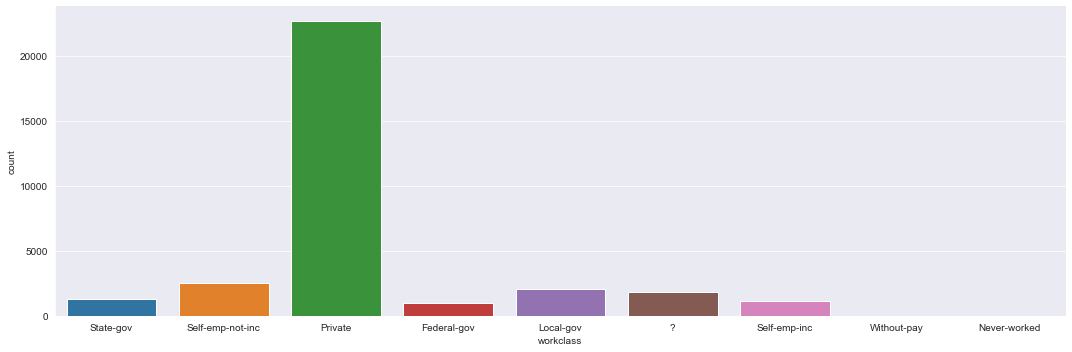

In [442]:
sns.catplot(x="workclass", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

We do have minority classes but since there's only 9 classes, I do not think it is ideal to remove a class as we need an overview of all classes. 

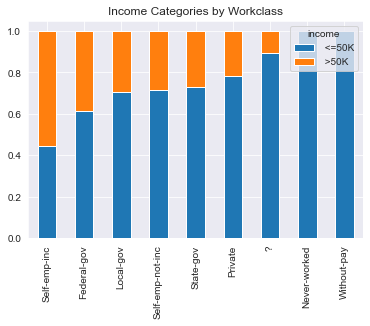

In [443]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['workclass'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Workclass')
plt.xticks(rotation=90)
plt.show()

In [444]:
df_pct

income,<=50K,>50K
workclass,,
Self-emp-inc,0.442652,0.557348
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Private,0.781327,0.218673
?,0.895969,0.104031
Never-worked,1.000000,0.000000
Without-pay,1.000000,0.000000


##### Interpretation
These results show the percentage of individuals who have an income of less than or equal to 50K and greater than 50K, grouped by their workclass.

For example, of the individuals who are self-employed in the incorporated sector, 44.3% have an income of less than or equal to 50K, while 55.7% have an income greater than 50K.

The results also show that individuals who work in the federal government have a higher percentage of income less than or equal to 50K than those who have an income greater than 50K. On the other hand, individuals who are self-employed without incorporation have a higher percentage of income less than 50K than those who have an income greater than 50K.

The results also show that individuals who have a workclass of never-worked or without-pay have an income of 0, meaning they do not have an income.

Finally, the "?" category has a higher percentage of individuals with an income less than or equal to 50K than those who have an income greater than 50K. It is possible that this "?" category represents missing data or a category that is not specified in the dataset.

As we can see in the count of our different classes, we have a lot of samples that belong to a "?" workclass. I believe this is because they have not reported their workclass or their is some confusion as to how to label that class. We will have to deal with this class

I replaced the '?' class with null values and will decide how to address these null values after analyzing the rest of the features as well

In [445]:
#replace ? with nan value
sal_df['workclass'] = sal_df.workclass.replace('?', np.NaN)

In [446]:
#check null values
sal_df.workclass.isnull().sum()

1836

#### Analyze 'education' variable

In [447]:
#check number of unique values
sal_df.education.nunique()

16

In [448]:
#Check names of classes
education_valcounts = sal_df.education.value_counts()
education_valcounts.keys()

Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [449]:
sal_df['education'] = sal_df.education.str.strip()

In [450]:
#check names of new classes
education_valcounts = sal_df.education.value_counts()
education_valcounts.keys()

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object')

In [451]:
education_valcounts

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

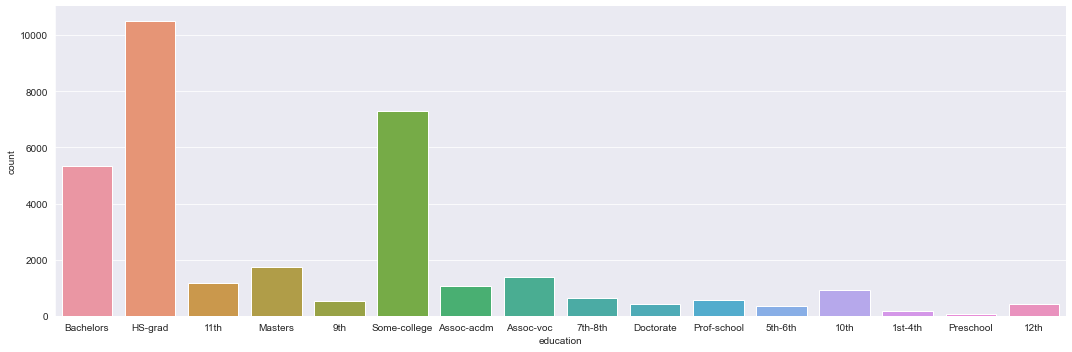

In [452]:
sns.catplot(x="education", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

This ordering reflects the typical progression of education levels in the US, making it a valid and informative way to categorize the education level of individuals in the dataset. Most people have highschool degrees as it is the most accessible.

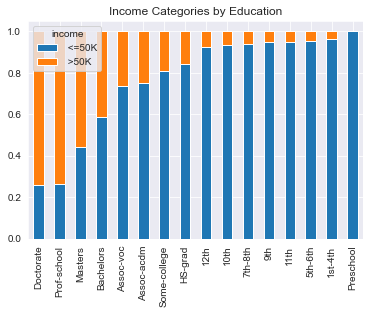

In [453]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['education'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Education')
plt.xticks(rotation=90)
plt.show()

In [454]:
df_pct

income,<=50K,>50K
education,,
Doctorate,0.259080,0.740920
Prof-school,0.265625,0.734375
Masters,0.443413,0.556587
Bachelors,0.585247,0.414753
Assoc-voc,0.738784,0.261216
Assoc-acdm,0.751640,0.248360
Some-college,0.809765,0.190235
HS-grad,0.840491,0.159509
12th,0.923788,0.076212


##### Interpretation
The results indicate that individuals with higher levels of education are more likely to earn a higher income. For example, among those with a Doctorate degree, 74% earn an income greater than 50K, and among those with a Professional school degree, 73% earn an income greater than 50K.

In contrast, individuals with lower levels of education are more likely to earn a lower income. For example, among those with only a high school diploma, 84% earn an income of less than or equal to 50K.

The results also show that the likelihood of earning a higher income generally increases as the level of education increases, although there are some exceptions. For example, among individuals with some college education, only 19% earn an income greater than 50K, which is lower than the proportion of individuals with an Associate degree who earn an income greater than 50K.

Overall, these results provide valuable insights into the relationship between education level and income in the sample, suggesting that individuals with higher levels of education are more likely to earn a higher income.

#### Analyze 'marital_status' variable

In [455]:
#check number of unique values
sal_df.marital_status.nunique()

7

In [456]:
#Check names of classes
marital_status_valcounts = sal_df.marital_status.value_counts()
marital_status_valcounts.keys()

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [457]:
sal_df['marital_status'] = sal_df.marital_status.str.strip()

In [458]:
#check names of new classes
marital_status_valcounts = sal_df.marital_status.value_counts()
marital_status_valcounts.keys()

Index(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype='object')

In [459]:
marital_status_valcounts

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

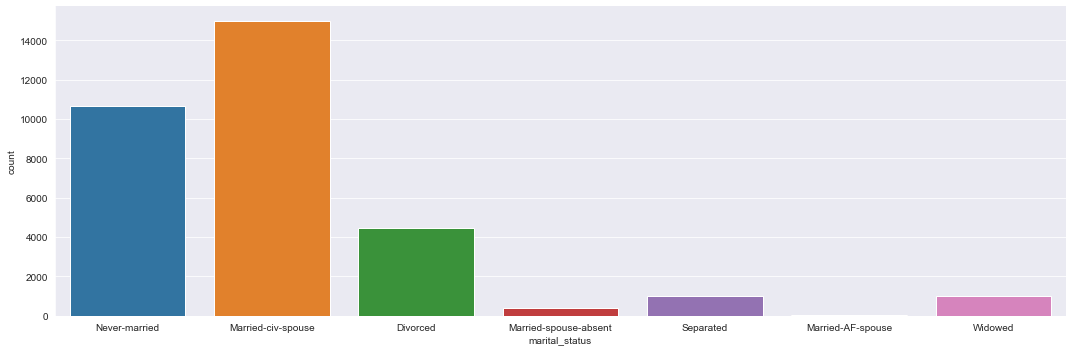

In [460]:
sns.catplot(x="marital_status", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

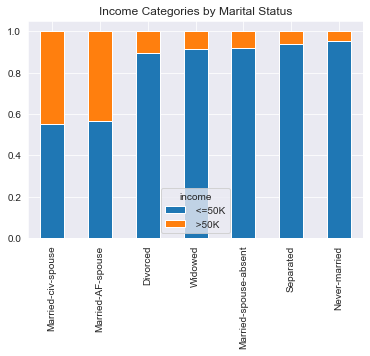

In [461]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['marital_status'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Marital Status')
plt.xticks(rotation=90)
plt.show()

In [462]:
df_pct

income,<=50K,>50K
marital_status,,
Married-civ-spouse,0.553152,0.446848
Married-AF-spouse,0.565217,0.434783
Divorced,0.895791,0.104209
Widowed,0.914401,0.085599
Married-spouse-absent,0.918660,0.081340
Separated,0.935610,0.064390
Never-married,0.954039,0.045961


##### Interpretation
The results suggest that individuals who are married (either civilian or military) have a relatively even distribution of income levels, with around 45-55% of each group earning more than 50K. This suggests that being married may not be a strong predictor of income level on its own.

In contrast, individuals who are divorced, widowed, or have a spouse who is absent have a much higher likelihood of earning less than or equal to 50K, with around 91-90% of these groups earning less than or equal to 50K. Similarly, individuals who are separated or never married have a higher likelihood of earning less than or equal to 50K, with around 94-95% of these groups earning less than or equal to 50K.

These results suggest that marital status may be a useful factor in predicting income level, with married individuals having a more even distribution of income levels, and those who are divorced, widowed, or have a spouse who is absent, separated, or never married being more likely to earn a lower income. However, it is important to note that these results are based on the sample and may not be generalizable to the population as a whole.

#### Analyze 'occupation' variable

In [463]:
#check number of unique values
sal_df.occupation.nunique()

15

In [464]:
#Check names of classes
occupation_valcounts = sal_df.occupation.value_counts()
occupation_valcounts.keys()

Index([' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' ?',
       ' Transport-moving', ' Handlers-cleaners', ' Farming-fishing',
       ' Tech-support', ' Protective-serv', ' Priv-house-serv',
       ' Armed-Forces'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [465]:
sal_df['occupation'] = sal_df.occupation.str.strip()

In [466]:
#check names of new classes
occupation_valcounts = sal_df.occupation.value_counts()
occupation_valcounts.keys()

Index(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
      dtype='object')

In [467]:
occupation_valcounts

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

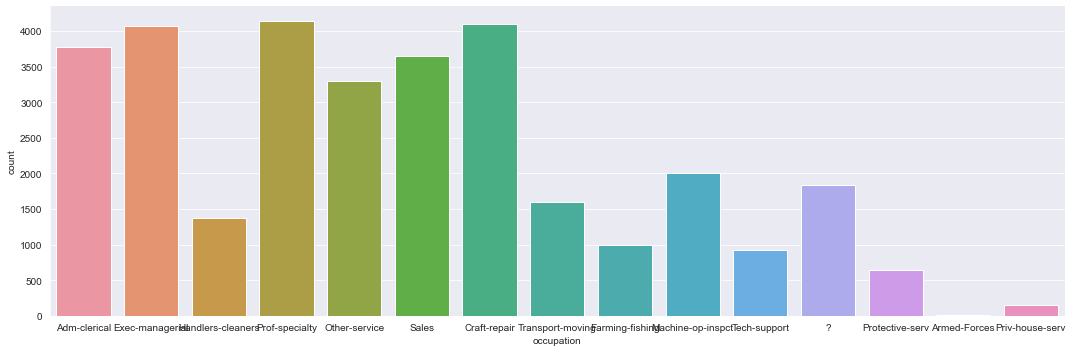

In [468]:
sns.catplot(x="occupation", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

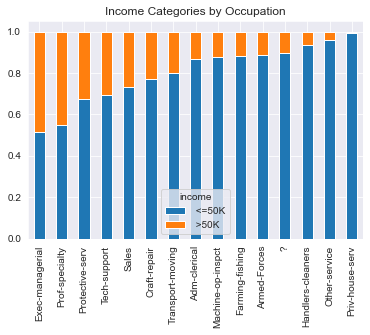

In [469]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['occupation'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

In [470]:
df_pct

income,<=50K,>50K
occupation,,
Exec-managerial,0.515986,0.484014
Prof-specialty,0.550966,0.449034
Protective-serv,0.674884,0.325116
Tech-support,0.695043,0.304957
Sales,0.730685,0.269315
Craft-repair,0.773359,0.226641
Transport-moving,0.799624,0.200376
Adm-clerical,0.865517,0.134483
Machine-op-inspct,0.875125,0.124875


##### Interpretation

In general, it appears that individuals in higher-paying occupations such as "Exec-managerial" and "Prof-specialty" are more likely to have income greater than 50K, while individuals in lower-paying occupations such as "Other-service" and "Priv-house-serv" are more likely to have income less than or equal to $50K.

It is important to note that the occupation "?" has a relatively high proportion of individuals with income less than or equal to $50K at 89.6, which could indicate missing or incomplete data.

As we see from the data values, there is a class labelled ? which is similar to the workclass column. There is also the same number of values that belong to the ? as it did in the workclass column. We will look at couple of samples that belong to the ? class in the occupation column

In [471]:
sal_df[sal_df.occupation == '?'].head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,NaN,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K


As we can see, most of the samples belonged to the ? class in the workclass column too (we changed them to null). We will follow a similar process and change the ? to nan values

In [472]:
#replace ? with nan value
sal_df['occupation'] = sal_df.occupation.replace('?', np.NaN)

In [473]:
#check null values
sal_df.occupation.isnull().sum()

1843

#### Analyze 'relationship' variable

In [474]:
#check number of unique values
sal_df.relationship.nunique()

6

In [475]:
#Check names of classes
relationship_valcounts = sal_df.relationship.value_counts()
relationship_valcounts.keys()

Index([' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife',
       ' Other-relative'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [476]:
sal_df['relationship'] = sal_df.relationship.str.strip()

In [477]:
#check names of new classes
relationship_valcounts = sal_df.relationship.value_counts()
relationship_valcounts.keys()

Index(['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative'],
      dtype='object')

In [478]:
relationship_valcounts

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

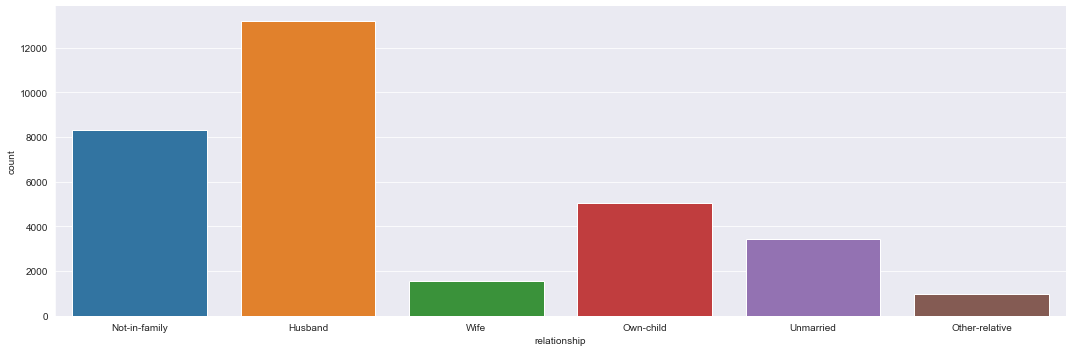

In [479]:
sns.catplot(x="relationship", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

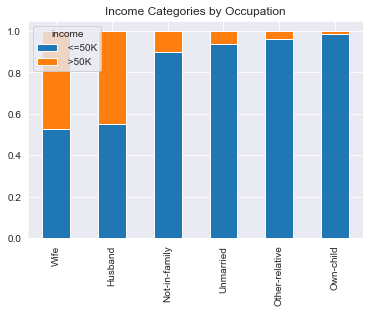

In [480]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['relationship'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

In [481]:
df_pct

income,<=50K,>50K
relationship,,
Wife,0.524872,0.475128
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Unmarried,0.936738,0.063262
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220


##### Interpretation

The table can be used to understand the relationship between income and relationship status. For instance, we can see that individuals who are not in a family have a much higher proportion of income less than or equal to 50K than those who are married or in a relationship.

#### Analyze 'race' variable

In [482]:
#check number of unique values
sal_df.race.nunique()

5

In [483]:
#Check names of classes
race_valcounts = sal_df.race.value_counts()
race_valcounts.keys()

Index([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [484]:
sal_df['race'] = sal_df.race.str.strip()

In [485]:
#check names of new classes
race_valcounts = sal_df.race.value_counts()
race_valcounts.keys()

Index(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], dtype='object')

In [486]:
race_valcounts

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

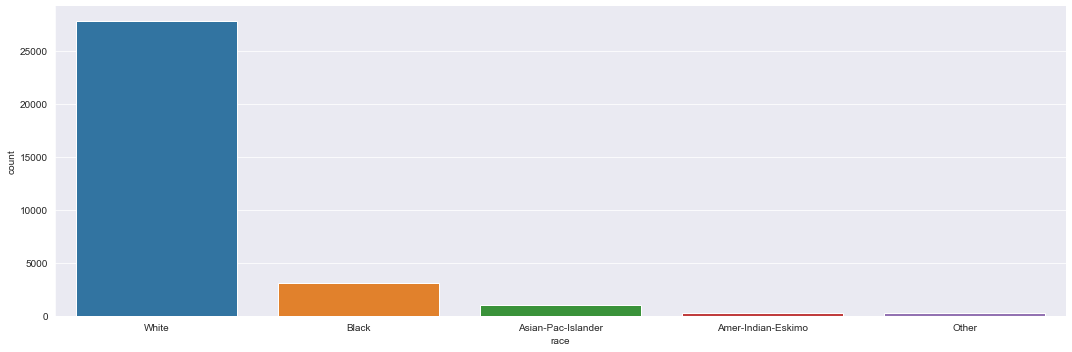

In [487]:
sns.catplot(x="race", kind='count' ,  data=sal_df, aspect=3)
sns.despine()

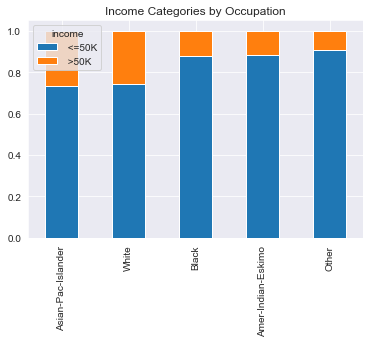

In [488]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['race'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

In [489]:
df_pct

income,<=50K,>50K
race,,
Asian-Pac-Islander,0.734360,0.265640
White,0.744140,0.255860
Black,0.876120,0.123880
Amer-Indian-Eskimo,0.884244,0.115756
Other,0.907749,0.092251


#### Interpretation
For example, the table shows that a higher proportion of individuals in the Black and Amer-Indian-Eskimo categories have an income level of less than or equal to 50K compared to other race categories. However, it is also important to consider how this could perpetuate biases and discrimination. We will decide if race is a column we should use later on

#### Analyze 'sex' variable

In [490]:
#check number of unique values
sal_df.sex.nunique()

2

In [491]:
#Check names of classes
sex_valcounts = sal_df.sex.value_counts()
sex_valcounts.keys()

Index([' Male', ' Female'], dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [492]:
sal_df['sex'] = sal_df.sex.str.strip()

In [493]:
#check names of new classes
sex_valcounts = sal_df.sex.value_counts()
sex_valcounts.keys()

Index(['Male', 'Female'], dtype='object')

In [494]:
sex_valcounts

Male      21790
Female    10771
Name: sex, dtype: int64

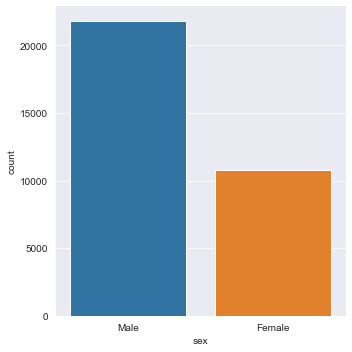

In [495]:
sns.catplot(x="sex", kind='count' ,  data=sal_df)
sns.despine()

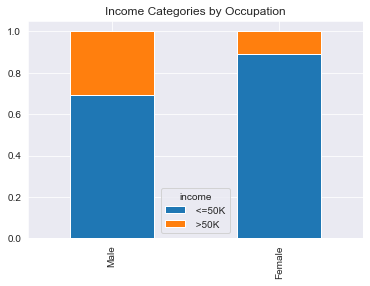

In [496]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['sex'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

In [497]:
df_pct

income,<=50K,>50K
sex,,
Male,0.694263,0.305737
Female,0.890539,0.109461


##### Interpretation
The results show that a higher proportion of females have an income level of less than or equal to 50K compared to males.

#### Analyze 'native_country' variable

In [498]:
#check number of unique values
sal_df.native_country.nunique()

42

In [499]:
#Check names of classes
native_country_valcounts = sal_df.native_country.value_counts()
native_country_valcounts.keys()

Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba',
       ' England', ' Jamaica', ' South', ' China', ' Italy',
       ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Japan', ' Poland',
       ' Columbia', ' Taiwan', ' Haiti', ' Iran', ' Portugal', ' Nicaragua',
       ' Peru', ' France', ' Greece', ' Ecuador', ' Ireland', ' Hong',
       ' Cambodia', ' Trinadad&Tobago', ' Laos', ' Thailand', ' Yugoslavia',
       ' Outlying-US(Guam-USVI-etc)', ' Honduras', ' Hungary', ' Scotland',
       ' Holand-Netherlands'],
      dtype='object')

We see that the names of our classes have extra spaces. I will strip the string of every sample to remove those spaces

In [500]:
sal_df['native_country'] = sal_df.native_country.str.strip()

In [501]:
#Check new names of classes
native_country_valcounts = sal_df.native_country.value_counts()
native_country_valcounts.keys()

Index(['United-States', 'Mexico', '?', 'Philippines', 'Germany', 'Canada',
       'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica',
       'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala',
       'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal',
       'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador', 'Ireland', 'Hong',
       'Cambodia', 'Trinadad&Tobago', 'Laos', 'Thailand', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland',
       'Holand-Netherlands'],
      dtype='object')

In [502]:
native_country_valcounts

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Since the United Kingdom IS made up of England, Scotland, Wales and Ireland, we can merge those together as they are a minority class

In [503]:
#replace values
sal_df['native_country'].replace(['England', 'Scotland', 'Ireland'],['United-Kingdom', 'United-Kingdom',
                                                                    'United-Kingdom'], inplace=True)

Since there is only one sample of Holland, we will remove it as it is a minority class and might affect results.

In [504]:
print("Data size before dropping Holand:", sal_df.shape)
sal_df.drop(sal_df[sal_df['native_country'].isin(['Holand-Netherlands'])].index, inplace=True)
print("Data size after dropping Holand:", sal_df.shape)

Data size before dropping Holand: (32561, 15)
Data size after dropping Holand: (32560, 15)


In [505]:
#check new value counts after merging categories and dropping Holand
native_country_valcounts = sal_df.native_country.value_counts()
native_country_valcounts

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
United-Kingdom                  126
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

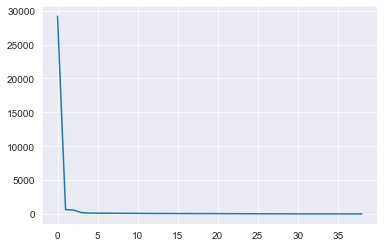

In [506]:
plt.plot(sal_df['native_country'].value_counts().values)

There is one very large category (United-States) and the rest have around the same number of values

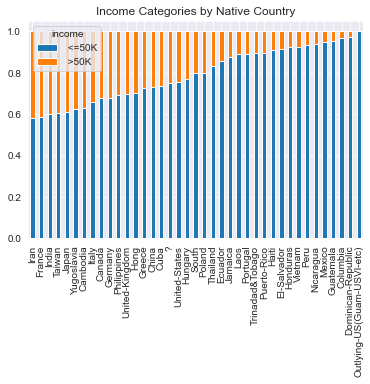

In [507]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(sal_df['native_country'], sal_df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Native Country')
plt.xticks(rotation=90)
plt.show()

In [508]:
df_pct

income,<=50K,>50K
native_country,,
Iran,0.581395,0.418605
France,0.586207,0.413793
India,0.600000,0.400000
Taiwan,0.607843,0.392157
Japan,0.612903,0.387097
Yugoslavia,0.625000,0.375000
Cambodia,0.631579,0.368421
Italy,0.657534,0.342466
Canada,0.677686,0.322314


##### Interpretation
We can observe that the proportion of individuals with an income greater than 50K varies widely among different countries. For instance, in Iran, France, and India, the proportion of individuals with an income greater than 50K is close to 40%, while in countries like Mexico, Guatemala, and the Dominican Republic, this proportion is less than 3%.

Additionally, we can see that the proportion of individuals with an income greater than 50K in the United States is 24.58%, which is lower than the proportion in countries such as Canada and Germany. This information could be useful for individuals or organizations that want to target their products or services towards individuals with a higher income level, as they may want to focus on countries with a higher proportion of individuals with high incomes.

Additionally, we see a class labelled ? again. We will replace them with a nan value

In [509]:
#replace ? with nan value
sal_df['native_country'] = sal_df.native_country.replace('?', np.NaN)

In [510]:
#check null values
sal_df.native_country.isnull().sum()

583

### Exploring numerical variables
Since we have explored the categorical variables above, we will do the same for the numerical variables

In [511]:
print(f'The numerical columns are: {num_cols}')

The numerical columns are: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


#### Analyze 'age' variable

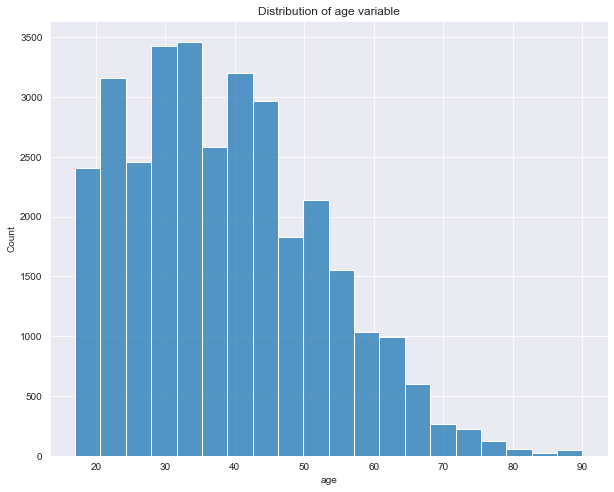

In [512]:
#look at distribution of age
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['age']
ax = sns.histplot(x, bins=20)
ax.set_title("Distribution of age variable")
plt.show()

<AxesSubplot:xlabel='age'>

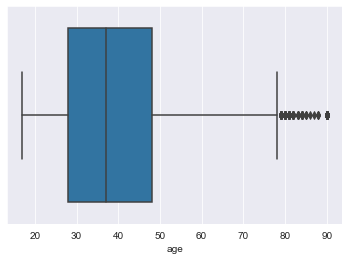

In [513]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['age'], orient='h')

In [514]:
#calculate statistics of the age column
median = np.median(sal_df['age'])
std = np.std(sal_df['age'])
mean = np.mean(sal_df['age'])
Q1 = sal_df['age'].quantile(0.25)
Q3 = sal_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 28.0
The third quartile value is 48.0
The interquartile range is 20.0
The lower thresold is -2.0
The upper thresold is 78.0


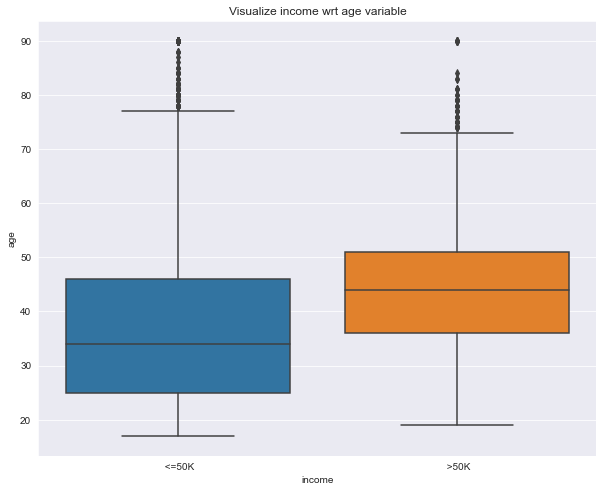

In [515]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=sal_df)
ax.set_title("Visualize income wrt age variable")
plt.show()

##### Interpretation
We can see that the age variable is slightly skewed. Most of the samples are between 20 and 40. There are a few values at the end of the spectrum which is representative of the population as the average of a human is 76 and values after 75 seem to be dipping. The age of samples in the <=50K class, is lower than the age in the >50K class. This shows that usually the more well off individuals are also older

#### Analyze 'fnlwgt' variable

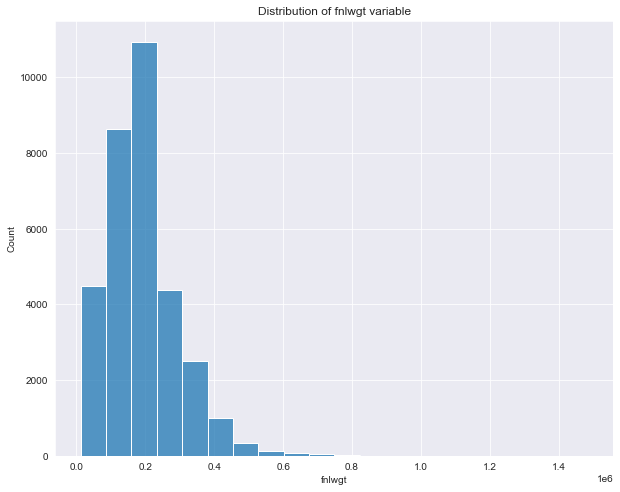

In [516]:
#look at distribution of fnlwgt
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['fnlwgt']
ax = sns.histplot(x, bins=20)
ax.set_title("Distribution of fnlwgt variable")
plt.show()

<AxesSubplot:xlabel='fnlwgt'>

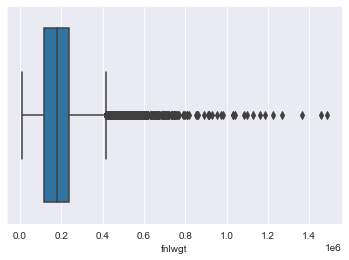

In [517]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['fnlwgt'], orient='h')

In [518]:
#calculate statistics of the age column
median = np.median(sal_df['fnlwgt'])
std = np.std(sal_df['fnlwgt'])
mean = np.mean(sal_df['fnlwgt'])
Q1 = sal_df['fnlwgt'].quantile(0.25)
Q3 = sal_df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 117831.5
The third quartile value is 237054.5
The interquartile range is 119223.0
The lower thresold is -61003.0
The upper thresold is 415889.0


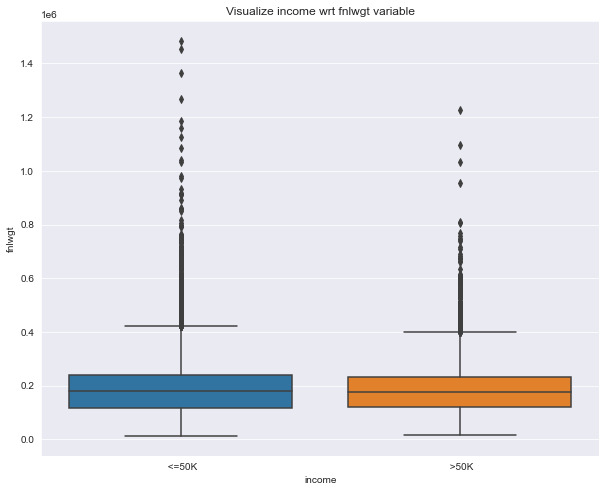

In [519]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="fnlwgt", data=sal_df)
ax.set_title("Visualize income wrt fnlwgt variable")
plt.show()

##### Interpretation
Final weight is what the dataset believes that the particular sample represents. There doesn't seem to be much of a difference in the two classes based off of the fnlwgt variable as they have roughly the same distribution

#### Analyze 'education_num' variable

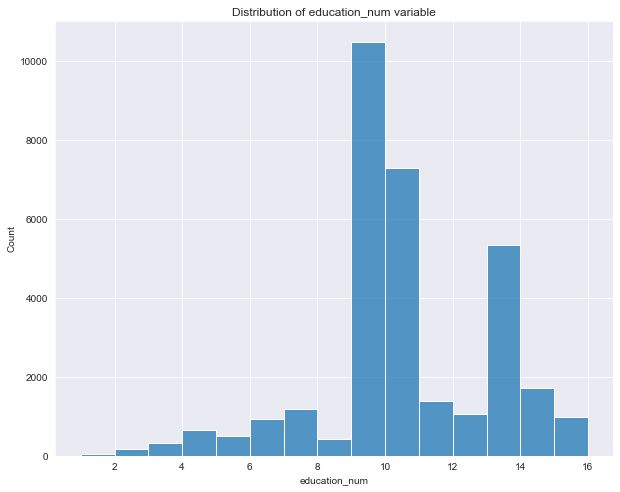

In [520]:
#look at distribution of education_num
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['education_num']
ax = sns.histplot(x, bins=15)
ax.set_title("Distribution of education_num variable")
plt.show()

<AxesSubplot:xlabel='education_num'>

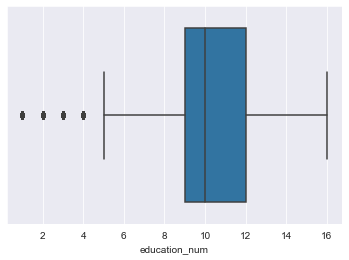

In [521]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['education_num'], orient='h')

In [522]:
#calculate statistics of the age column
median = np.median(sal_df['education_num'])
std = np.std(sal_df['education_num'])
mean = np.mean(sal_df['education_num'])
Q1 = sal_df['education_num'].quantile(0.25)
Q3 = sal_df['education_num'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 9.0
The third quartile value is 12.0
The interquartile range is 3.0
The lower thresold is 4.5
The upper thresold is 16.5


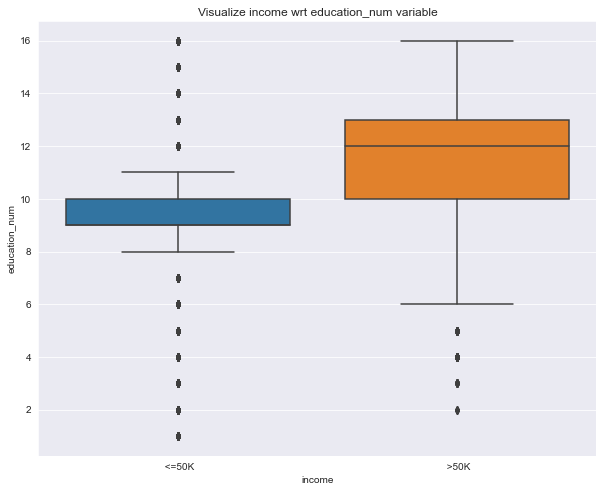

In [523]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="education_num", data=sal_df)
ax.set_title("Visualize income wrt education_num variable")
plt.show()

##### Interpretation
As we saw with the education variable, the level of education has a relation to the income of the person. The higher the education the more likely they earn >50K. In the >50K class we see that the majority of people have a higher education number than those in the <=50K. The distribution of the overall education_num variable is also indicative of the real world as not many get higher degrees than a high school/bachelors degree and that's why there is a peak at around 10.

#### Analyze 'capital_gain' variable

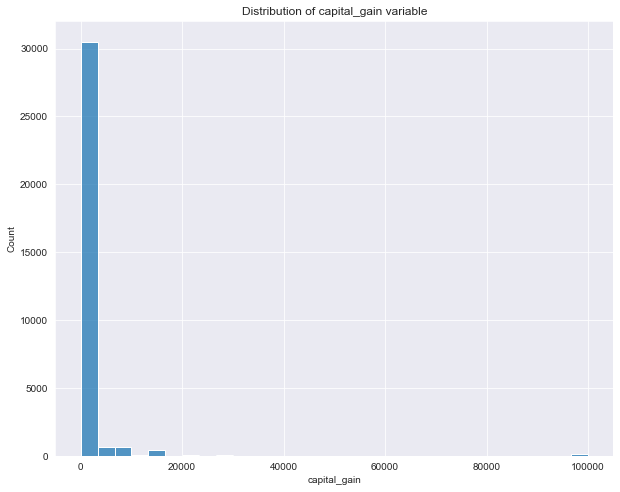

In [524]:
#look at distribution of age
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['capital_gain']
ax = sns.histplot(x, bins=30)
ax.set_title("Distribution of capital_gain variable")
plt.show()

<AxesSubplot:xlabel='capital_gain'>

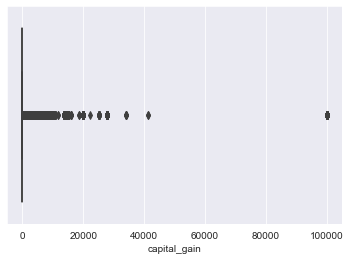

In [525]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['capital_gain'], orient='h')

(-500.0, 500.0)

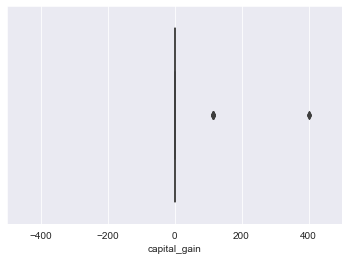

In [526]:
#change limit to see the boxplot better
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['capital_gain'], orient='h')
plt.xlim(-500, 500)

In [527]:
#calculate statistics of the age column
median = np.median(sal_df['capital_gain'])
std = np.std(sal_df['capital_gain'])
mean = np.mean(sal_df['capital_gain'])
Q1 = sal_df['capital_gain'].quantile(0.25)
Q3 = sal_df['capital_gain'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 0.0
The third quartile value is 0.0
The interquartile range is 0.0
The lower thresold is 0.0
The upper thresold is 0.0


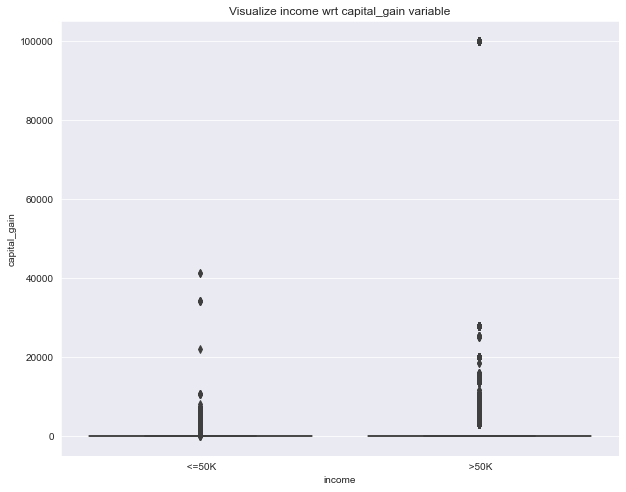

In [528]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="capital_gain", data=sal_df)
ax.set_title("Visualize income wrt capital_gain variable")
plt.show()

In [529]:
#find samples that have capital_gain value greater than 0
check_df = sal_df[sal_df.capital_gain > 0]

In [530]:
#check number of samples with income greater than 50K and capital gain greater than 0
len(check_df[check_df.income == ' >50K'])

1677

In [531]:
#check number of samples with income less than 50K and capital gain greater than 0
len(check_df[check_df.income == ' <=50K'])

1035

##### Interpretation
Most of the samples have a 0 in the capital_gain column and this could be because it is not being reported or most people do not have any capital gain to report because they do no invest. We can also see that the number of people who have a capital_gain amount that is greater than 0 is larger in the >50K class than the same group in <=50K class. We should also consider that there are more people in the <=50K class which makes it evident that it is more likely that you belong to the >50K class if you have capital gains

#### Analyze 'capital_loss' variable

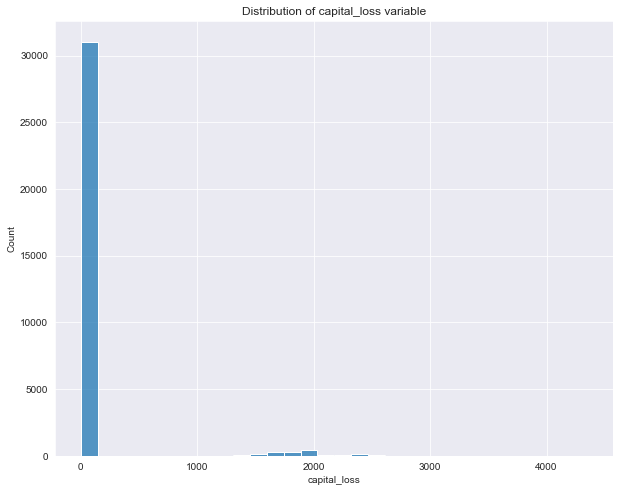

In [532]:
#look at distribution of capital_loss
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['capital_loss']
ax = sns.histplot(x, bins=30)
ax.set_title("Distribution of capital_loss variable")
plt.show()

<AxesSubplot:xlabel='capital_loss'>

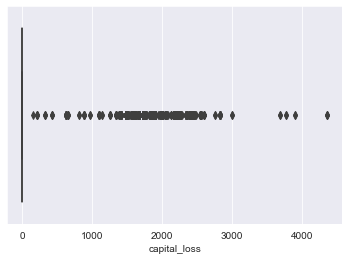

In [533]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['capital_loss'], orient='h')

(-500.0, 500.0)

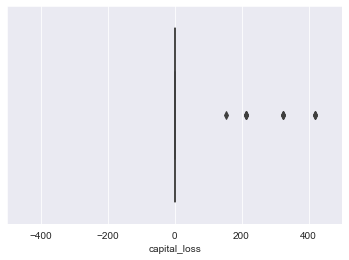

In [534]:
#change limit to see the boxplot better
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['capital_loss'], orient='h')
plt.xlim(-500, 500)

In [535]:
#calculate statistics of the age column
median = np.median(sal_df['capital_loss'])
std = np.std(sal_df['capital_loss'])
mean = np.mean(sal_df['capital_loss'])
Q1 = sal_df['capital_loss'].quantile(0.25)
Q3 = sal_df['capital_loss'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 0.0
The third quartile value is 0.0
The interquartile range is 0.0
The lower thresold is 0.0
The upper thresold is 0.0


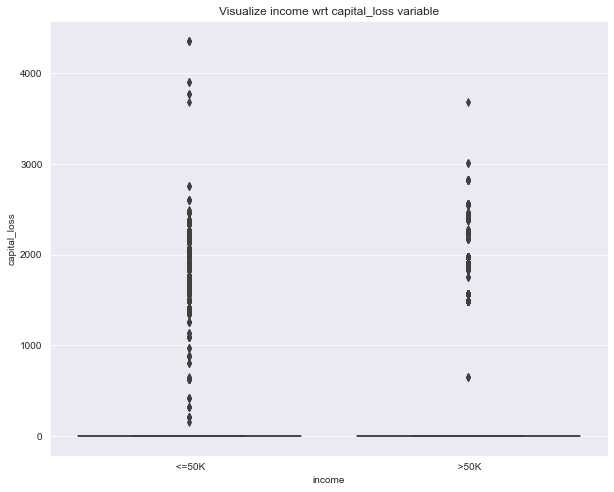

In [536]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="capital_loss", data=sal_df)
ax.set_title("Visualize income wrt capital_loss variable")
plt.show()

##### Interpretation
We can see that the class with <=50K have more values reported of capital_loss which is indicitive. This shows that if you do have capital_loss, it is more likely that you are in <=50K class. Capital loss is indicitive of how the person's income is being used and how much their investments are being returned

#### Analyze 'hours_per_week' variable

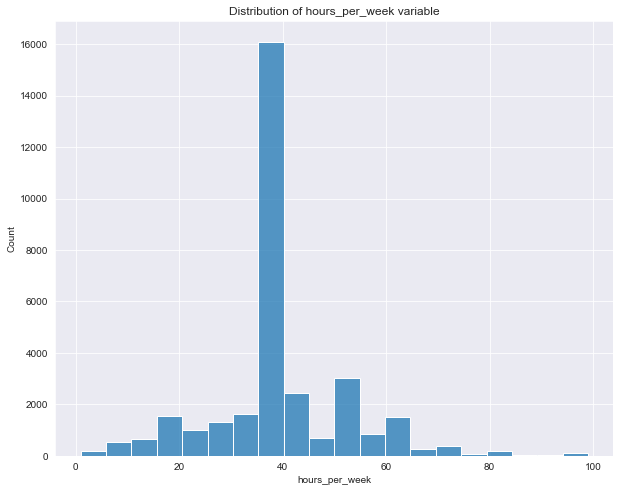

In [537]:
#look at distribution of hours_per_week
f, ax = plt.subplots(figsize=(10,8))
x = sal_df['hours_per_week']
ax = sns.histplot(x, bins=20)
ax.set_title("Distribution of hours_per_week variable")
plt.show()

<AxesSubplot:xlabel='hours_per_week'>

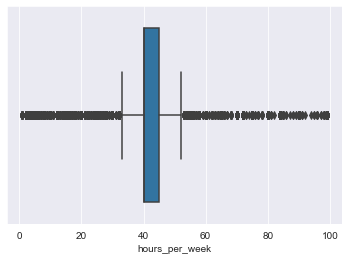

In [538]:
#plot boxplot of age
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=sal_df['hours_per_week'], orient='h')

In [539]:
#calculate statistics of the age column
median = np.median(sal_df['hours_per_week'])
std = np.std(sal_df['hours_per_week'])
mean = np.mean(sal_df['hours_per_week'])
Q1 = sal_df['hours_per_week'].quantile(0.25)
Q3 = sal_df['hours_per_week'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 40.0
The third quartile value is 45.0
The interquartile range is 5.0
The lower thresold is 32.5
The upper thresold is 52.5


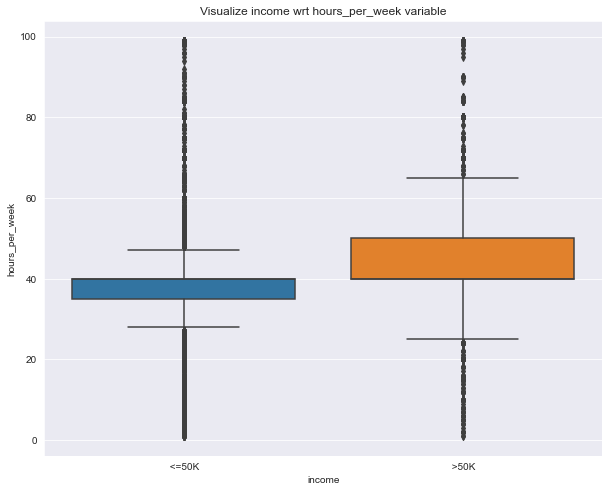

In [540]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="hours_per_week", data=sal_df)
ax.set_title("Visualize income wrt hours_per_week variable")
plt.show()

##### Interpretation
From the visualization above, we can tell that the class with >50K usually has samples with hours_per_week near 40-50, while in the <=50K class, the samples are usually near 35-40. This could possibly mean that higher hours could mean a higher income.

#### Missing Values
Before we analyze the target variable, we will look at the missing values in the columns. We have missing values after removing the class '?' from 3 columns. Let's look at the number of missing values

In [541]:
#check missing values
sal_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

We will deal with these missing values while also looking at the target variable

#### Analyze target variable ('income') and balance data

Now we will look at the target variable which is 'income'. We will look at the value_counts and the distribution of the values in the column.

In [542]:
#look at values in income column
sal_df.income.value_counts().keys()

Index([' <=50K', ' >50K'], dtype='object')

Since there is extra spaces, we have to strip the strings

In [543]:
#strip spaces
sal_df['income'] = sal_df.income.str.strip()

In [544]:
#look at values in income column
sal_df.income.value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

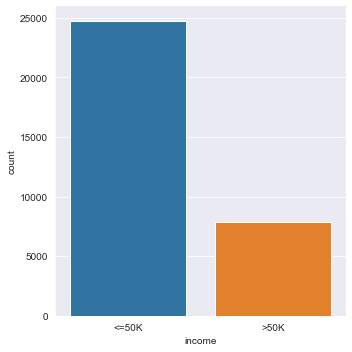

In [545]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.catplot(x="income", kind='count' , data=sal_df)
sns.despine()
plt.show()

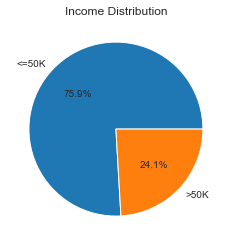

In [546]:
income_counts = sal_df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()

There are two classes in the income column which is either <=50K or >50K. However, we can see that the two classes are imbalanced with the class with >50k having only 7841 samples when compared to <=50K having 24720.

Imbalanced data can pose a challenge for binary classification algorithms because they tend to be biased towards the majority class. This means that the algorithm may have high accuracy on the majority class but low accuracy on the minority class, which is often the class of interest. In such cases, the algorithm may incorrectly classify most of the minority class samples as belonging to the majority class, leading to false negatives and false positives.

There are several techniques that can be used to address imbalanced data in binary classification, such as oversampling the minority class, undersampling the majority class, or using cost-sensitive learning. These techniques aim to balance the distribution of samples across the two classes and improve the performance of the algorithm on the minority class. I will be undersampling the majority class as I would still have roughly 7800 samples for each class (15600 samples total) which I think is enough. 

Before undersampling the majority class, we can remove the samples with null values from the majority class. Since we are going to be losing samples from the majority class, we might as well remove the ones with null values.

To reiterate we will remove values from the <=50K if any of the columns are null

In [547]:
sal_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [548]:
#filter out to get majority class which is <=50K
sal_df_majority = sal_df[(sal_df.income == '<=50K')]

Get index of null values in the <=50K dataframe in the occupation column

In [549]:
#get index of null values in <=50K class for occupation column
null_ind = sal_df_majority[sal_df_majority.occupation.isnull()].index

In [550]:
#drop index of null values
sal_df.drop(index=null_ind, inplace=True)

In [551]:
#check null values remaining
sal_df.isnull().sum()

age                 0
workclass         191
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        191
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    560
income              0
dtype: int64

We can repeat this process for the native_country column

In [552]:
#filter out to get majority class which is <=50K
sal_df_majority = sal_df[(sal_df.income == '<=50K')]

In [553]:
#get index of null values in <=50K class for native_country column
null_ind = sal_df_majority[sal_df_majority.native_country.isnull()].index

In [554]:
#drop index of null values
sal_df.drop(index=null_ind, inplace=True)

In [555]:
#check null values
sal_df.isnull().sum()

age                 0
workclass         191
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        191
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    146
income              0
dtype: int64

Check the distibution of the income variable again

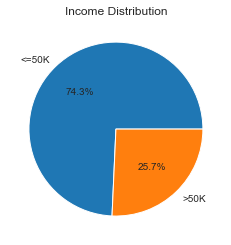

In [556]:
income_counts = sal_df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()

In [557]:
#look at values in income column
sal_df.income.value_counts()

<=50K    22653
>50K      7841
Name: income, dtype: int64

In [558]:
sal_df[sal_df.workclass.isnull()].head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K


Now that we have removed the null values from the majority class (<=50K), we have to decide how to deal with the null values in the minority class (>50K). I have decided to use an imputer to replace the missing values. Using an imputer to replace missing values in the minority class of a binary classification task can help improve the accuracy, generalization ability, and integrity of your data, while also helping to avoid bias in your model. 

I'm using the SimpleImputer module from sklearn and setting the strategy as most_frequent. This will replace the null values with the most frequent class in that column

In [559]:
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sal_df.workclass = imp_most_freq.fit_transform(sal_df['workclass'].values.reshape(-1,1))[:,0]
sal_df.occupation = imp_most_freq.fit_transform(sal_df['occupation'].values.reshape(-1,1))[:,0]
sal_df.native_country = imp_most_freq.fit_transform(sal_df['native_country'].values.reshape(-1,1))[:,0]

In [560]:
sal_df.loc[[27, 154]]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,Private,180211,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
154,52,Private,252903,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,>50K


As we can see from the dataframe after imputing missing values, the null values in the workclass were replaced with the value that was most frequent in that column which is 'Private' and we now have no null values

In [561]:
sal_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Since we have imputed all all the null values we will now undersample the majority class. 

In [562]:
#import the imblearn module
from imblearn.under_sampling import RandomUnderSampler

I will seperate the dataframe into X and y to use the RandomUnderSampler module on the data.

In [563]:
#seperate X and y data
inc_sample = sal_df.income
final_df = sal_df.drop('income', axis = 1)

In [564]:
print(f'The shape of X before being undersampled is: {final_df.shape}')
print(f'The shape of y before being undersampled is: {inc_sample.shape}')

The shape of X before being undersampled is: (30494, 14)
The shape of y before being undersampled is: (30494,)


In [565]:
#undersample data
rus = RandomUnderSampler(random_state=0)
final_df, inc_sample = rus.fit_resample(final_df,inc_sample)

In [566]:
print(f'The shape of X after being undersampled is: {final_df.shape}')
print(f'The shape of y after being undersampled is: {inc_sample.shape}')

The shape of X after being undersampled is: (15682, 14)
The shape of y after being undersampled is: (15682,)


Since we have balanced the data now, we can just add the resampled X data and the y data together in a new dataframe

In [567]:
#append income column to dataframe
final_df['income'] = inc_sample

In [568]:
print(f'The shape of the dataframe after resampling: {final_df.shape}')

The shape of the dataframe after resampling: (15682, 15)


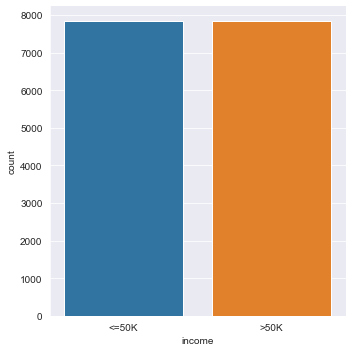

In [569]:
#Look at distribution of classes in 'income'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.catplot(x="income", kind='count' , data=final_df)
sns.despine()
plt.show()

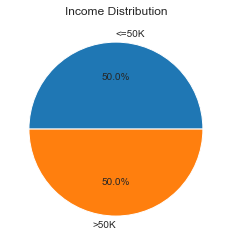

In [570]:
income_counts = final_df['income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()

In [571]:
#look at values in income column
final_df.income.value_counts()

<=50K    7841
>50K     7841
Name: income, dtype: int64

The distributions of the two classes are now equal and we have a balanced dataset.

Let's look at the correlation matrix of the dataframe

### Feature Engineering

Categorical variables in a dataset cannot be directly used by most machine learning algorithms because these algorithms typically work with numerical data. Therefore, categorical variables must be converted into numerical values before they can be used by these algorithms. One common way to do this is by using one-hot encoding.

I will first seperate the features and the target

I'll replace the income column values by mapping them as follows: {"<=50K":0, ">50K":1}

In [572]:
final_df['income'] = final_df.income.replace('<=50K', 0)
final_df['income'] = final_df.income.replace('>50K', 1)

I'll repeat the process for the sex column as well since it only has 2 values. I will replace them as follows : {"Male":0, "Female":1}

In [573]:
final_df['sex'] = final_df.sex.replace('Male', 0)
final_df['sex'] = final_df.sex.replace('Female', 1)

<AxesSubplot:>

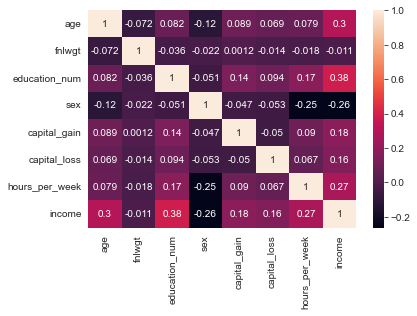

In [646]:
sns.heatmap(final_df.corr(), annot = True)

I'll define functions that will encode the categorical variables below

In [574]:
#encode columns with two unique values
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

#encode columns with more than two unique values
def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [575]:
data = onehot_encode(final_df, ['workclass', 'education', 'marital_status', 
                                'occupation', 'relationship', 'race', 'native_country'])

Now that I have encoded the categorical variables, I will scale the values. Scaling the values in a dataframe is important because many machine learning algorithms and models are sensitive to the scale of the input features. If the features in your dataset are measured on different scales or have vastly different ranges, this can lead to some problems when training a model.

For example, some algorithms that use distance metrics, such as k-nearest neighbors, can be biased towards features with larger scales. This is because the distance between two points is dominated by the feature with the largest scale. This can lead to inaccurate predictions, especially if the features with smaller scales are actually more important for the model.

By using MinMaxScaler, you can scale all the features in your dataset to a common range (usually 0 to 1), which will ensure that all features are weighted equally during training. MinMaxScaler works by subtracting the minimum value of each feature and dividing by the range, which scales the feature to the desired range.

Overall, scaling your features with MinMaxScaler can help your models perform better by reducing the impact of differences in feature scales and allowing the model to learn more effectively from the data.

In [576]:
#look at unscaled data
data.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-Kingdom,United-States,Vietnam,Yugoslavia
0,36,122493,9,0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,27,332187,13,1,0,0,65,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,199596,10,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,82,71438,9,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,23,119704,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [577]:
y = data['income']
X = data.drop('income', axis=1)

In [578]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [579]:
X.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,South,Taiwan,Thailand,Trinadad&Tobago,United-Kingdom,United-States,Vietnam,Yugoslavia
0,0.260274,0.075416,0.533333,0.0,0.0,0.0,0.469388,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.136986,0.220868,0.800000,1.0,0.0,0.0,0.653061,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.397260,0.128897,0.600000,1.0,0.0,0.0,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.890411,0.040002,0.533333,0.0,0.0,0.0,0.193878,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.082192,0.073481,0.600000,1.0,0.0,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We have now standardized the values in every column so that it ranges between 0 and 1

In [587]:
X.shape

(15682, 100)

In [580]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pca.fit(X)
X_new = pca.transform(X)

### Split Data

The step of splitting data into test and train sets is an important step in machine learning to evaluate how well a trained model can generalize to new, unseen data. This step involves dividing the available data into two subsets: a training set and a testing set.

The training set is used to train the machine learning model, while the testing set is used to evaluate the performance of the trained model on new, unseen data. This approach is necessary because the ultimate goal of machine learning is to create models that can perform well on new, unseen data.

I will be using an 80/20 split method. The 80/20 training:testing ratio is a common split used in machine learning, where 80% of the data is used for training the model, and the remaining 20% is used for testing the model's performance. This ratio is often used as a default because it strikes a balance between having enough data to train the model well and having enough data to test the model's performance accurately. However, different splits could work better and I would have to try different splits to see the affect it has on the data

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

## Model

I will be exploring three models - Logistic Regression, Random Forest Classifier and SVM. I will first run the data on the baseline models. Then I will tune the parameters with GridSearchCV and find the best model.

In [589]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#initialize model
log_clf = LogisticRegression(max_iter = 500)

#train model
log_clf.fit(X_train, y_train)

#predict X_test values
log_clf_pred = log_clf.predict(X_test)

#look at classification report
print(classification_report(y_test, log_clf_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.80      0.76      0.78      1555
        >50K       0.77      0.82      0.79      1582

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137



<AxesSubplot:>

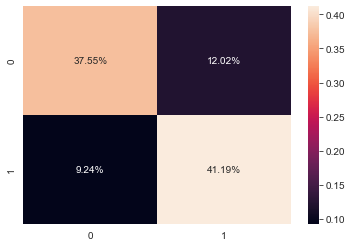

In [590]:
cm = confusion_matrix(y_test, log_clf_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

#### Interpretation
The logistic regression model achieved an accuracy of 0.79 on the test data. The precision for the '<=50K' class is 0.80, which means that out of all the instances predicted as '<=50K', 80% were actually '<=50K'. The recall for the '<=50K' class is 0.76, which means that out of all the actual '<=50K' instances, 76% were correctly predicted as '<=50K'. The precision for the '>50K' class is 0.77, which means that out of all the instances predicted as '>50K', 77% were actually '>50K'. The recall for the '>50K' class is 0.82, which means that out of all the actual '>50K' instances, 82% were correctly predicted as '>50K'. The F1-score, which is the harmonic mean of precision and recall, is 0.78 for both classes. Overall, the model seems to have performed reasonably well, with similar precision and recall values for both classes.

In [591]:
from sklearn.ensemble import RandomForestClassifier

#initialize model
rf_clf = RandomForestClassifier()

#train model
rf_clf.fit(X_train, y_train)

#predict X_test values
rf_clf_pred = rf_clf.predict(X_test)

#look at classification report
print(classification_report(y_test, rf_clf_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.78      0.78      0.78      1555
        >50K       0.78      0.78      0.78      1582

    accuracy                           0.78      3137
   macro avg       0.78      0.78      0.78      3137
weighted avg       0.78      0.78      0.78      3137



<AxesSubplot:>

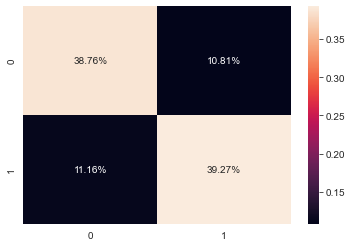

In [592]:
cm = confusion_matrix(y_test, rf_clf_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

 #### Interpretation
 The random forest classifier achieved an accuracy of 0.78, which is slightly lower than the accuracy of the logistic regression model (0.79). However, the precision, recall, and f1-score for both classes are the same for the random forest classifier, indicating that it is equally good at predicting both classes. In contrast, the logistic regression model has slightly higher precision for the ">50K" class and slightly higher recall for the "<=50K" class.

Overall, both models have similar performance, but the logistic regression model may be slightly better at predicting the ">50K" class while the random forest classifier is equally good at predicting both classes.

In [593]:
from sklearn.svm import SVC

#initialize model
svc = SVC()

#train model
svc.fit(X_train, y_train)

#predict X_test values
svc_pred = svc.predict(X_test)

#look at classification report
print(classification_report(y_test, svc_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.82      0.75      0.78      1555
        >50K       0.77      0.83      0.80      1582

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137



<AxesSubplot:>

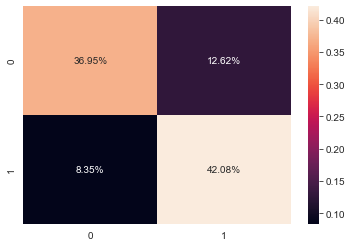

In [594]:
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')

#### Interpretation
The SVM classifier achieved an accuracy of 0.79 on the test data. The precision, recall, and F1-score for the <=50K class were 0.82, 0.75, and 0.78 respectively, while for the >50K class, they were 0.77, 0.83, and 0.80 respectively. Comparing these results to the logistic regression and random forest models, the SVM model achieved similar accuracy and F1-scores to the logistic regression model, but slightly lower F1-scores than the random forest model. The precision and recall scores for the SVM model were between the values obtained from the logistic regression and random forest models for both classes. Overall, the SVM model performed reasonably well on the test data but was not the best performing model among the three tested.

In [604]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize model
gbc = GradientBoostingClassifier()

#train model
gbc.fit(X_train, y_train)

#predict X_test values
gbc_pred = gbc.predict(X_test)

#look at classification report
print(classification_report(y_test, gbc_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.81      0.77      0.79      1555
        >50K       0.79      0.82      0.80      1582

    accuracy                           0.80      3137
   macro avg       0.80      0.80      0.80      3137
weighted avg       0.80      0.80      0.80      3137



From the baseline models we can see that logistic regression performed the best out of all the models

### Hyperparameter Tuning

In hyperparameter tuning, we systematically evaluate different combinations of hyperparameters to find the combination that results in the best performance of the model on a validation set. This is usually done using a grid search or a randomized search approach.

Grid search involves specifying a set of possible values for each hyperparameter, and then testing all possible combinations of these values. Randomized search is similar to grid search, but rather than testing all possible combinations, it randomly samples a subset of possible combinations. Both methods can be computationally expensive, particularly when the number of hyperparameters and the range of possible values are large.

We'll tune the parameters of logistic regression first. We'll define a grid that the gridsearch function can traverse to find the best parameters

In [614]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 0.5, 1, 5, 10, 50], 
    'solver': ['liblinear']
}

In [615]:
from sklearn.model_selection import GridSearchCV

#initialize model
log_clf_cv = LogisticRegression(max_iter = 500)

log_clf_gs = GridSearchCV(estimator=log_clf_cv, param_grid=param_grid, verbose = 10, scoring='precision')

log_clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START C=0.1, penalty=l1, solver=liblinear........................
[CV 1/5; 1/12] END C=0.1, penalty=l1, solver=liblinear;, score=0.790 total time=   0.0s
[CV 2/5; 1/12] START C=0.1, penalty=l1, solver=liblinear........................
[CV 2/5; 1/12] END C=0.1, penalty=l1, solver=liblinear;, score=0.761 total time=   0.0s
[CV 3/5; 1/12] START C=0.1, penalty=l1, solver=liblinear........................
[CV 3/5; 1/12] END C=0.1, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 4/5; 1/12] START C=0.1, penalty=l1, solver=liblinear........................
[CV 4/5; 1/12] END C=0.1, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 5/5; 1/12] START C=0.1, penalty=l1, solver=liblinear........................
[CV 5/5; 1/12] END C=0.1, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5; 2/12] START C=0.1, penalty=l2, solver=liblinear........................
[CV 1/5; 2/12

[CV 4/5; 10/12] END C=10, penalty=l2, solver=liblinear;, score=0.765 total time=   0.0s
[CV 5/5; 10/12] START C=10, penalty=l2, solver=liblinear........................
[CV 5/5; 10/12] END C=10, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5; 11/12] START C=50, penalty=l1, solver=liblinear........................
[CV 1/5; 11/12] END C=50, penalty=l1, solver=liblinear;, score=0.790 total time=   0.0s
[CV 2/5; 11/12] START C=50, penalty=l1, solver=liblinear........................
[CV 2/5; 11/12] END C=50, penalty=l1, solver=liblinear;, score=0.762 total time=   0.0s
[CV 3/5; 11/12] START C=50, penalty=l1, solver=liblinear........................
[CV 3/5; 11/12] END C=50, penalty=l1, solver=liblinear;, score=0.764 total time=   0.0s
[CV 4/5; 11/12] START C=50, penalty=l1, solver=liblinear........................
[CV 4/5; 11/12] END C=50, penalty=l1, solver=liblinear;, score=0.765 total time=   0.0s
[CV 5/5; 11/12] START C=50, penalty=l1, solver=liblinear...........

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='precision', verbose=10)

In [616]:
log_clf_gs.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}

The best parameters for the logistic regression model is {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}. We can now find the classification report with those parameters

In [617]:
#initialize model
log_clf = LogisticRegression(C = 0.5, penalty = 'l2', solver='liblinear')

#train model
log_clf.fit(X_train, y_train)

#predict X_test values
log_clf_pred = log_clf.predict(X_test)

#look at classification report
print(classification_report(y_test, log_clf_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.80      0.76      0.78      1555
        >50K       0.77      0.82      0.79      1582

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137



We do not see a difference in the values after tuning the parameters of the logistic regression model

In [618]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt', 'log2', 2, 3]
}

In [621]:
rf_clf_cv = RandomForestClassifier()

rf_clf_gs = GridSearchCV(estimator=rf_clf_cv, param_grid=param_grid, verbose = 10, scoring='precision')

rf_clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5; 1/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 1/5; 1/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.786 total time=   1.1s
[CV 2/5; 1/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 2/5; 1/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.768 total time=   1.1s
[CV 3/5; 1/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 3/5; 1/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.775 total time=   1.1s
[CV 4/5; 1/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 4/5; 1/540] END max_depth=10, max_features=sqrt, min_sa

[CV 3/5; 7/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.779 total time=   1.1s
[CV 4/5; 7/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 4/5; 7/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.777 total time=   1.1s
[CV 5/5; 7/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 5/5; 7/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.799 total time=   1.1s
[CV 1/5; 8/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 1/5; 8/540] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.784 total time=   2.3s
[CV 2/5; 8/540] START max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samp

[CV 5/5; 13/540] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.800 total time=   1.1s
[CV 1/5; 14/540] START max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 14/540] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.787 total time=   2.3s
[CV 2/5; 14/540] START max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 14/540] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.763 total time=   2.3s
[CV 3/5; 14/540] START max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 14/540] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.775 total time=   2.3s
[CV 4/5; 14/540] START max_depth=10, max_features=sqrt, min_samples_leaf

[CV 2/5; 20/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.763 total time=   2.3s
[CV 3/5; 20/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 20/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.773 total time=   2.3s
[CV 4/5; 20/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 20/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.777 total time=   2.3s
[CV 5/5; 20/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 20/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.792 total time=   2.3s
[CV 1/5; 21/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, mi

[CV 4/5; 26/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.777 total time=   2.3s
[CV 5/5; 26/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 5/5; 26/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.794 total time=   2.3s
[CV 1/5; 27/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 1/5; 27/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.787 total time=   4.5s
[CV 2/5; 27/540] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 2/5; 27/540] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.765 total time=   4.5s
[CV 3/5; 27/540] START max_depth=10, max_features=sqrt, min_samples_lea

[CV 1/5; 33/540] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.787 total time=   3.7s
[CV 2/5; 33/540] START max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 2/5; 33/540] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.764 total time=   3.7s
[CV 3/5; 33/540] START max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 3/5; 33/540] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.782 total time=   3.7s
[CV 4/5; 33/540] START max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 4/5; 33/540] END max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.778 total time=   3.7s
[CV 5/5; 33/540] START max_depth=10, max_features=log2, min_samples_lea

[CV 3/5; 39/540] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.774 total time=   3.7s
[CV 4/5; 39/540] START max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 4/5; 39/540] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.776 total time=   3.7s
[CV 5/5; 39/540] START max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 5/5; 39/540] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.795 total time=   3.7s
[CV 1/5; 40/540] START max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 40/540] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.783 total time=   0.9s
[CV 2/5; 40/540] START max_depth=10, max_features=log2, min_samples_leaf=4, mi

[CV 5/5; 45/540] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.793 total time=   3.7s
[CV 1/5; 46/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 1/5; 46/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.783 total time=   0.9s
[CV 2/5; 46/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 2/5; 46/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.764 total time=   0.9s
[CV 3/5; 46/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 3/5; 46/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.780 total time=   0.9s
[CV 4/5; 46/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 2/5; 52/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.766 total time=   0.9s
[CV 3/5; 52/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 3/5; 52/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.772 total time=   0.9s
[CV 4/5; 52/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 4/5; 52/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.781 total time=   0.9s
[CV 5/5; 52/540] START max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 5/5; 52/540] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.796 total time=   0.9s
[CV 1/5; 53/540] START max_depth=10, max_features=log2, min_samples_leaf=5, mi

[CV 5/5; 58/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.799 total time=   0.5s
[CV 1/5; 59/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 1/5; 59/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.793 total time=   1.1s
[CV 2/5; 59/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 2/5; 59/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.772 total time=   1.1s
[CV 3/5; 59/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 3/5; 59/540] END max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.776 total time=   1.1s
[CV 4/5; 59/540] START max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10

[CV 3/5; 65/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.778 total time=   1.0s
[CV 4/5; 65/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 65/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.780 total time=   1.1s
[CV 5/5; 65/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 65/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.802 total time=   1.1s
[CV 1/5; 66/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 1/5; 66/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.785 total time=   2.1s
[CV 2/5; 66/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_est

[CV 1/5; 72/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.791 total time=   2.1s
[CV 2/5; 72/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 2/5; 72/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.767 total time=   2.1s
[CV 3/5; 72/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 3/5; 72/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.776 total time=   2.1s
[CV 4/5; 72/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 4/5; 72/540] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.780 total time=   2.1s
[CV 5/5; 72/540] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=1

[CV 4/5; 78/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.776 total time=   2.1s
[CV 5/5; 78/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 5/5; 78/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.800 total time=   2.1s
[CV 1/5; 79/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 1/5; 79/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.782 total time=   0.5s
[CV 2/5; 79/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 2/5; 79/540] END max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.772 total time=   0.5s
[CV 3/5; 79/540] START max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n

[CV 2/5; 85/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.767 total time=   0.7s
[CV 3/5; 85/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 3/5; 85/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.7s
[CV 4/5; 85/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 4/5; 85/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.776 total time=   0.7s
[CV 5/5; 85/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 5/5; 85/540] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.7s
[CV 1/5; 86/540] START max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_es

[CV 5/5; 91/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.798 total time=   0.7s
[CV 1/5; 92/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 1/5; 92/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.784 total time=   1.4s
[CV 2/5; 92/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 2/5; 92/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.769 total time=   1.4s
[CV 3/5; 92/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 92/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.772 total time=   1.5s
[CV 4/5; 92/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_esti

[CV 3/5; 98/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.777 total time=   1.4s
[CV 4/5; 98/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 4/5; 98/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.776 total time=   1.5s
[CV 5/5; 98/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 5/5; 98/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.800 total time=   1.5s
[CV 1/5; 99/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 1/5; 99/540] END max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.787 total time=   2.9s
[CV 2/5; 99/540] START max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=1

[CV 1/5; 105/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.786 total time=   2.9s
[CV 2/5; 105/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 2/5; 105/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.767 total time=   2.9s
[CV 3/5; 105/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 3/5; 105/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.774 total time=   2.9s
[CV 4/5; 105/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 4/5; 105/540] END max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.773 total time=   2.9s
[CV 5/5; 105/540] START max_depth=10, max_features=3, min_samples_leaf=5, min_samples

[CV 3/5; 111/540] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.778 total time=   5.9s
[CV 4/5; 111/540] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 4/5; 111/540] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.784 total time=   5.9s
[CV 5/5; 111/540] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 5/5; 111/540] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.803 total time=   5.9s
[CV 1/5; 112/540] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 1/5; 112/540] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.794 total time=   1.5s
[CV 2/5; 112/540] START max_depth=20, max_features=sqrt, min_samples_le

[CV 5/5; 117/540] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.801 total time=   5.9s
[CV 1/5; 118/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 1/5; 118/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.793 total time=   1.4s
[CV 2/5; 118/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 2/5; 118/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.777 total time=   1.4s
[CV 3/5; 118/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 3/5; 118/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.779 total time=   1.5s
[CV 4/5; 118/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4,

[CV 2/5; 124/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.779 total time=   1.4s
[CV 3/5; 124/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 3/5; 124/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.778 total time=   1.4s
[CV 4/5; 124/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 4/5; 124/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.785 total time=   1.4s
[CV 5/5; 124/540] START max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 5/5; 124/540] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.806 total time=   1.4s
[CV 1/5; 125/540] START max_depth=20, max_features=sqrt, min_samples_le

[CV 4/5; 130/540] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.784 total time=   1.4s
[CV 5/5; 130/540] START max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 5/5; 130/540] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.811 total time=   1.4s
[CV 1/5; 131/540] START max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 131/540] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.797 total time=   2.8s
[CV 2/5; 131/540] START max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/5; 131/540] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.779 total time=   2.8s
[CV 3/5; 131/540] START max_depth=20, max_features=sqrt, min_sample

[CV 1/5; 137/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.800 total time=   2.4s
[CV 2/5; 137/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 2/5; 137/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.779 total time=   2.4s
[CV 3/5; 137/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 137/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.780 total time=   2.4s
[CV 4/5; 137/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 137/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.784 total time=   2.4s
[CV 5/5; 137/540] START max_depth=20, max_features=log2, min_samples_le

[CV 3/5; 143/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.783 total time=   2.4s
[CV 4/5; 143/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 4/5; 143/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.790 total time=   2.4s
[CV 5/5; 143/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 5/5; 143/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.806 total time=   2.4s
[CV 1/5; 144/540] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 1/5; 144/540] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.797 total time=   4.8s
[CV 2/5; 144/540] START max_depth=20, max_features=log2, min_sam

[CV 5/5; 149/540] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.810 total time=   2.3s
[CV 1/5; 150/540] START max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 1/5; 150/540] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.799 total time=   4.7s
[CV 2/5; 150/540] START max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 2/5; 150/540] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.776 total time=   4.6s
[CV 3/5; 150/540] START max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 150/540] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.780 total time=   4.7s
[CV 4/5; 150/540] START max_depth=20, max_features=log2, min_sam

[CV 2/5; 156/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.775 total time=   4.6s
[CV 3/5; 156/540] START max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200
[CV 3/5; 156/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.782 total time=   4.6s
[CV 4/5; 156/540] START max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200
[CV 4/5; 156/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.786 total time=   4.6s
[CV 5/5; 156/540] START max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200
[CV 5/5; 156/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.804 total time=   4.6s
[CV 1/5; 157/540] START max_depth=20, max_features=log2, min_samples_le

[CV 4/5; 162/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.790 total time=   4.6s
[CV 5/5; 162/540] START max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 5/5; 162/540] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.810 total time=   4.6s
[CV 1/5; 163/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 1/5; 163/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.804 total time=   0.7s
[CV 2/5; 163/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 2/5; 163/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.771 total time=   0.7s
[CV 3/5; 163/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_sample

[CV 2/5; 169/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.778 total time=   0.7s
[CV 3/5; 169/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 3/5; 169/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.785 total time=   0.7s
[CV 4/5; 169/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 4/5; 169/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.781 total time=   0.7s
[CV 5/5; 169/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 5/5; 169/540] END max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.813 total time=   0.7s
[CV 1/5; 170/540] START max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=

[CV 5/5; 175/540] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.805 total time=   0.6s
[CV 1/5; 176/540] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 176/540] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.799 total time=   1.3s
[CV 2/5; 176/540] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 176/540] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.779 total time=   1.3s
[CV 3/5; 176/540] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 176/540] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.791 total time=   1.3s
[CV 4/5; 176/540] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_

[CV 3/5; 182/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.786 total time=   1.3s
[CV 4/5; 182/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 182/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.789 total time=   1.3s
[CV 5/5; 182/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 182/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.813 total time=   1.3s
[CV 1/5; 183/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200
[CV 1/5; 183/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.803 total time=   2.5s
[CV 2/5; 183/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=

[CV 1/5; 189/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.808 total time=   2.5s
[CV 2/5; 189/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 2/5; 189/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.782 total time=   2.5s
[CV 3/5; 189/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 3/5; 189/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.785 total time=   2.5s
[CV 4/5; 189/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 4/5; 189/540] END max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.792 total time=   2.5s
[CV 5/5; 189/540] START max_depth=20, max_features=2, min_samples_leaf=5, min_samples

[CV 4/5; 195/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.786 total time=   3.7s
[CV 5/5; 195/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 5/5; 195/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.806 total time=   3.7s
[CV 1/5; 196/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 1/5; 196/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.798 total time=   0.9s
[CV 2/5; 196/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 2/5; 196/540] END max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.780 total time=   0.9s
[CV 3/5; 196/540] START max_depth=20, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 2/5; 202/540] END max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.775 total time=   0.9s
[CV 3/5; 202/540] START max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 202/540] END max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.779 total time=   0.9s
[CV 4/5; 202/540] START max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 202/540] END max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.787 total time=   0.9s
[CV 5/5; 202/540] START max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 202/540] END max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.800 total time=   0.9s
[CV 1/5; 203/540] START max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=

[CV 4/5; 208/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.781 total time=   0.9s
[CV 5/5; 208/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 5/5; 208/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.802 total time=   0.9s
[CV 1/5; 209/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 1/5; 209/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.805 total time=   1.8s
[CV 2/5; 209/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 2/5; 209/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.775 total time=   1.8s
[CV 3/5; 209/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, 

[CV 2/5; 215/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.778 total time=   1.8s
[CV 3/5; 215/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 3/5; 215/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.783 total time=   1.8s
[CV 4/5; 215/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 4/5; 215/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.790 total time=   1.8s
[CV 5/5; 215/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 5/5; 215/540] END max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.808 total time=   1.8s
[CV 1/5; 216/540] START max_depth=20, max_features=3, min_samples_leaf=5, min_samples

[CV 4/5; 221/540] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.785 total time=   2.9s
[CV 5/5; 221/540] START max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 5/5; 221/540] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.804 total time=   2.9s
[CV 1/5; 222/540] START max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 1/5; 222/540] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.796 total time=   5.9s
[CV 2/5; 222/540] START max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 2/5; 222/540] END max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.778 total time=   5.9s
[CV 3/5; 222/540] START max_depth=30, max_features=sqrt, min_sam

[CV 1/5; 228/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.795 total time=   5.8s
[CV 2/5; 228/540] START max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 2/5; 228/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.780 total time=   5.7s
[CV 3/5; 228/540] START max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 3/5; 228/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.782 total time=   5.8s
[CV 4/5; 228/540] START max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 4/5; 228/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.785 total time=   5.8s
[CV 5/5; 228/540] START max_depth=30, max_features=sqrt, min_samples_le

[CV 3/5; 234/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.780 total time=   5.8s
[CV 4/5; 234/540] START max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 4/5; 234/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.791 total time=   5.8s
[CV 5/5; 234/540] START max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 5/5; 234/540] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.808 total time=   5.8s
[CV 1/5; 235/540] START max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 1/5; 235/540] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.791 total time=   1.4s
[CV 2/5; 235/540] START max_depth=30, max_features=sqrt, min_samples

[CV 5/5; 240/540] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.806 total time=   5.7s
[CV 1/5; 241/540] START max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 1/5; 241/540] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.793 total time=   1.4s
[CV 2/5; 241/540] START max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 2/5; 241/540] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.774 total time=   1.4s
[CV 3/5; 241/540] START max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 3/5; 241/540] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.776 total time=   1.4s
[CV 4/5; 241/540] START max_depth=30, max_features=sqrt, min_samples_l

[CV 2/5; 247/540] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.778 total time=   1.2s
[CV 3/5; 247/540] START max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 3/5; 247/540] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.786 total time=   1.2s
[CV 4/5; 247/540] START max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 4/5; 247/540] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.780 total time=   1.2s
[CV 5/5; 247/540] START max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 5/5; 247/540] END max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.806 total time=   1.2s
[CV 1/5; 248/540] START max_depth=30, max_features=log2, min_samples_le

[CV 4/5; 253/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.781 total time=   1.3s
[CV 5/5; 253/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 5/5; 253/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.800 total time=   1.2s
[CV 1/5; 254/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 1/5; 254/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.789 total time=   2.5s
[CV 2/5; 254/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 2/5; 254/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.780 total time=   2.4s
[CV 3/5; 254/540] START max_depth=30, max_features=log2, min_samples_leaf=

[CV 1/5; 260/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.800 total time=   2.3s
[CV 2/5; 260/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 2/5; 260/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.774 total time=   2.3s
[CV 3/5; 260/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 3/5; 260/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.781 total time=   2.3s
[CV 4/5; 260/540] START max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 4/5; 260/540] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.788 total time=   2.4s
[CV 5/5; 260/540] START max_depth=30, max_features=log2, min_sam

[CV 3/5; 266/540] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.778 total time=   2.3s
[CV 4/5; 266/540] START max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 4/5; 266/540] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.787 total time=   2.3s
[CV 5/5; 266/540] START max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 5/5; 266/540] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.806 total time=   2.3s
[CV 1/5; 267/540] START max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 1/5; 267/540] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.794 total time=   4.6s
[CV 2/5; 267/540] START max_depth=30, max_features=log2, min_sam

[CV 5/5; 272/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.804 total time=   1.3s
[CV 1/5; 273/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 1/5; 273/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.801 total time=   2.7s
[CV 2/5; 273/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 2/5; 273/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.784 total time=   2.7s
[CV 3/5; 273/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 3/5; 273/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.785 total time=   2.7s
[CV 4/5; 273/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=

[CV 2/5; 279/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.785 total time=   2.7s
[CV 3/5; 279/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 3/5; 279/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.784 total time=   2.6s
[CV 4/5; 279/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 4/5; 279/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.790 total time=   2.6s
[CV 5/5; 279/540] START max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 5/5; 279/540] END max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.809 total time=   2.7s
[CV 1/5; 280/540] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples

[CV 5/5; 285/540] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.811 total time=   2.6s
[CV 1/5; 286/540] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 1/5; 286/540] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.802 total time=   0.7s
[CV 2/5; 286/540] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 2/5; 286/540] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.778 total time=   0.7s
[CV 3/5; 286/540] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 3/5; 286/540] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.784 total time=   0.6s
[CV 4/5; 286/540] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split

[CV 3/5; 292/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.785 total time=   0.6s
[CV 4/5; 292/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 4/5; 292/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.786 total time=   0.7s
[CV 5/5; 292/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 5/5; 292/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.809 total time=   0.7s
[CV 1/5; 293/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 293/540] END max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.804 total time=   1.3s
[CV 2/5; 293/540] START max_depth=30, max_features=2, min_samples_leaf=5, min_samples_spli

[CV 1/5; 299/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.800 total time=   1.9s
[CV 2/5; 299/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 2/5; 299/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.782 total time=   1.9s
[CV 3/5; 299/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 299/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.782 total time=   1.9s
[CV 4/5; 299/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 299/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.785 total time=   1.9s
[CV 5/5; 299/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=

[CV 4/5; 305/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.790 total time=   1.9s
[CV 5/5; 305/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 5/5; 305/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.806 total time=   1.9s
[CV 1/5; 306/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 1/5; 306/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.799 total time=   3.7s
[CV 2/5; 306/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 2/5; 306/540] END max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.782 total time=   3.7s
[CV 3/5; 306/540] START max_depth=30, max_features=3, min_samples_leaf=3, min_samples

[CV 2/5; 312/540] END max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.778 total time=   3.7s
[CV 3/5; 312/540] START max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 3/5; 312/540] END max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.782 total time=   3.6s
[CV 4/5; 312/540] START max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 4/5; 312/540] END max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.792 total time=   3.7s
[CV 5/5; 312/540] START max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 5/5; 312/540] END max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.805 total time=   3.7s
[CV 1/5; 313/540] START max_depth=30, max_features=3, min_samples_leaf=4, min_samples

[CV 5/5; 318/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.809 total time=   3.6s
[CV 1/5; 319/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 1/5; 319/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.800 total time=   0.9s
[CV 2/5; 319/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 2/5; 319/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.776 total time=   0.9s
[CV 3/5; 319/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 3/5; 319/540] END max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.790 total time=   0.9s
[CV 4/5; 319/540] START max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=

[CV 2/5; 325/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.775 total time=   1.5s
[CV 3/5; 325/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 3/5; 325/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.780 total time=   1.5s
[CV 4/5; 325/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 4/5; 325/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.778 total time=   1.5s
[CV 5/5; 325/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 5/5; 325/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.799 total time=   1.6s
[CV 1/5; 326/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, m

[CV 4/5; 331/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.785 total time=   1.5s
[CV 5/5; 331/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 5/5; 331/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.801 total time=   1.5s
[CV 1/5; 332/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 1/5; 332/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.797 total time=   2.9s
[CV 2/5; 332/540] START max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 2/5; 332/540] END max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.776 total time=   2.9s
[CV 3/5; 332/540] START max_depth=40, max_features=sqrt, min_sample

[CV 1/5; 338/540] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.801 total time=   2.9s
[CV 2/5; 338/540] START max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 338/540] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.775 total time=   2.9s
[CV 3/5; 338/540] START max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 338/540] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.783 total time=   2.9s
[CV 4/5; 338/540] START max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 338/540] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.785 total time=   2.9s
[CV 5/5; 338/540] START max_depth=40, max_features=sqrt, min_sam

[CV 3/5; 344/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.780 total time=   2.9s
[CV 4/5; 344/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 344/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.788 total time=   2.9s
[CV 5/5; 344/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 344/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.805 total time=   2.8s
[CV 1/5; 345/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=200
[CV 1/5; 345/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.795 total time=   5.6s
[CV 2/5; 345/540] START max_depth=40, max_features=sqrt, min_samples_le

[CV 5/5; 350/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.805 total time=   2.9s
[CV 1/5; 351/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 1/5; 351/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.797 total time=   5.6s
[CV 2/5; 351/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 2/5; 351/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.779 total time=   5.6s
[CV 3/5; 351/540] START max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200
[CV 3/5; 351/540] END max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.784 total time=   5.6s
[CV 4/5; 351/540] START max_depth=40, max_features=sqrt, min_sam

[CV 2/5; 357/540] END max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.779 total time=   4.8s
[CV 3/5; 357/540] START max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 3/5; 357/540] END max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.779 total time=   4.8s
[CV 4/5; 357/540] START max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 4/5; 357/540] END max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.784 total time=   4.8s
[CV 5/5; 357/540] START max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200
[CV 5/5; 357/540] END max_depth=40, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.800 total time=   4.9s
[CV 1/5; 358/540] START max_depth=40, max_features=log2, min_sam

[CV 4/5; 363/540] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.785 total time=   4.8s
[CV 5/5; 363/540] START max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 5/5; 363/540] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.804 total time=   4.8s
[CV 1/5; 364/540] START max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 364/540] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.797 total time=   1.2s
[CV 2/5; 364/540] START max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 364/540] END max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.776 total time=   1.2s
[CV 3/5; 364/540] START max_depth=40, max_features=log2, min_samples_le

[CV 1/5; 370/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.798 total time=   1.2s
[CV 2/5; 370/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 2/5; 370/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.776 total time=   1.2s
[CV 3/5; 370/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 3/5; 370/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.786 total time=   1.2s
[CV 4/5; 370/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 4/5; 370/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.790 total time=   1.2s
[CV 5/5; 370/540] START max_depth=40, max_features=log2, min_samples_leaf=5, m

[CV 3/5; 376/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.783 total time=   1.2s
[CV 4/5; 376/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 4/5; 376/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.782 total time=   1.1s
[CV 5/5; 376/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 5/5; 376/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.812 total time=   1.2s
[CV 1/5; 377/540] START max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 1/5; 377/540] END max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.796 total time=   2.3s
[CV 2/5; 377/540] START max_depth=40, max_features=log2, min_samples_

[CV 5/5; 382/540] END max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.809 total time=   0.7s
[CV 1/5; 383/540] START max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 1/5; 383/540] END max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.805 total time=   1.4s
[CV 2/5; 383/540] START max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 2/5; 383/540] END max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.783 total time=   1.3s
[CV 3/5; 383/540] START max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 3/5; 383/540] END max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.786 total time=   1.3s
[CV 4/5; 383/540] START max_depth=40, max_features=2, min_samples_leaf=3, min_samples_

[CV 3/5; 389/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.786 total time=   1.3s
[CV 4/5; 389/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 389/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.788 total time=   1.3s
[CV 5/5; 389/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 389/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.807 total time=   1.3s
[CV 1/5; 390/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 1/5; 390/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.794 total time=   2.7s
[CV 2/5; 390/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=

[CV 1/5; 396/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.801 total time=   2.6s
[CV 2/5; 396/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 2/5; 396/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.783 total time=   2.6s
[CV 3/5; 396/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 3/5; 396/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.781 total time=   2.7s
[CV 4/5; 396/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 4/5; 396/540] END max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.791 total time=   2.6s
[CV 5/5; 396/540] START max_depth=40, max_features=2, min_samples_leaf=4, min_samples

[CV 4/5; 402/540] END max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.790 total time=   2.6s
[CV 5/5; 402/540] START max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 5/5; 402/540] END max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.805 total time=   2.6s
[CV 1/5; 403/540] START max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 1/5; 403/540] END max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.802 total time=   0.6s
[CV 2/5; 403/540] START max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 2/5; 403/540] END max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.778 total time=   0.7s
[CV 3/5; 403/540] START max_depth=40, max_features=2, min_samples_leaf=5, min_samples_spl

[CV 2/5; 409/540] END max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.777 total time=   0.9s
[CV 3/5; 409/540] START max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 3/5; 409/540] END max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.781 total time=   0.9s
[CV 4/5; 409/540] START max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 4/5; 409/540] END max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.786 total time=   1.0s
[CV 5/5; 409/540] START max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 5/5; 409/540] END max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.802 total time=   1.0s
[CV 1/5; 410/540] START max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=

[CV 4/5; 415/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.784 total time=   0.9s
[CV 5/5; 415/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 5/5; 415/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.800 total time=   0.9s
[CV 1/5; 416/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 1/5; 416/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.800 total time=   1.8s
[CV 2/5; 416/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 2/5; 416/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.777 total time=   1.8s
[CV 3/5; 416/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, 

[CV 2/5; 422/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.780 total time=   1.8s
[CV 3/5; 422/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 3/5; 422/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.782 total time=   1.8s
[CV 4/5; 422/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 4/5; 422/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.782 total time=   1.8s
[CV 5/5; 422/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 5/5; 422/540] END max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.809 total time=   1.8s
[CV 1/5; 423/540] START max_depth=40, max_features=3, min_samples_leaf=4, min_samples

[CV 5/5; 428/540] END max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.803 total time=   1.8s
[CV 1/5; 429/540] START max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 1/5; 429/540] END max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.799 total time=   3.7s
[CV 2/5; 429/540] START max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 2/5; 429/540] END max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.778 total time=   3.6s
[CV 3/5; 429/540] START max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 3/5; 429/540] END max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.784 total time=   3.6s
[CV 4/5; 429/540] START max_depth=40, max_features=3, min_samples_leaf=5, min_samples

[CV 2/5; 435/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.777 total time=   5.9s
[CV 3/5; 435/540] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 3/5; 435/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.780 total time=   5.9s
[CV 4/5; 435/540] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 4/5; 435/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.787 total time=   6.0s
[CV 5/5; 435/540] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200
[CV 5/5; 435/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.803 total time=   6.0s
[CV 1/5; 436/540] START max_depth=None, max_features=sqrt

[CV 3/5; 441/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.781 total time=   5.9s
[CV 4/5; 441/540] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 4/5; 441/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.784 total time=   5.8s
[CV 5/5; 441/540] START max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200
[CV 5/5; 441/540] END max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.804 total time=   5.9s
[CV 1/5; 442/540] START max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 1/5; 442/540] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.789 total time=   1.5s
[CV 2/5; 442/540] START max_depth=None, max_features=s

[CV 4/5; 447/540] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.788 total time=   5.8s
[CV 5/5; 447/540] START max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 5/5; 447/540] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.803 total time=   5.9s
[CV 1/5; 448/540] START max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 1/5; 448/540] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.798 total time=   1.5s
[CV 2/5; 448/540] START max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 2/5; 448/540] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.780 total time=   1.4s
[CV 3/5; 448/540] START max_depth=None, max_features=s

[CV 5/5; 453/540] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.804 total time=   6.3s
[CV 1/5; 454/540] START max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 1/5; 454/540] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.796 total time=   1.4s
[CV 2/5; 454/540] START max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 2/5; 454/540] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.772 total time=   1.4s
[CV 3/5; 454/540] START max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50
[CV 3/5; 454/540] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.783 total time=   1.4s
[CV 4/5; 454/540] START max_depth=None, max_features=sqrt

[CV 1/5; 460/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.793 total time=   1.2s
[CV 2/5; 460/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 2/5; 460/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.776 total time=   1.2s
[CV 3/5; 460/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 3/5; 460/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.786 total time=   1.2s
[CV 4/5; 460/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50
[CV 4/5; 460/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=50;, score=0.781 total time=   1.3s
[CV 5/5; 460/540] START max_depth=None, max_features=log2, min_s

[CV 2/5; 466/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.774 total time=   1.2s
[CV 3/5; 466/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 3/5; 466/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.786 total time=   1.2s
[CV 4/5; 466/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 4/5; 466/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.788 total time=   1.2s
[CV 5/5; 466/540] START max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50
[CV 5/5; 466/540] END max_depth=None, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=50;, score=0.804 total time=   1.2s
[CV 1/5; 467/540] START max_depth=None, max_features=log2

[CV 3/5; 472/540] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.777 total time=   1.2s
[CV 4/5; 472/540] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 472/540] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.782 total time=   1.2s
[CV 5/5; 472/540] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 472/540] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.809 total time=   1.2s
[CV 1/5; 473/540] START max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 473/540] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.798 total time=   2.4s
[CV 2/5; 473/540] START max_depth=None, max_features=lo

[CV 4/5; 478/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.787 total time=   1.2s
[CV 5/5; 478/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50
[CV 5/5; 478/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=50;, score=0.807 total time=   1.2s
[CV 1/5; 479/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 1/5; 479/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.801 total time=   2.3s
[CV 2/5; 479/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 2/5; 479/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.780 total time=   2.3s
[CV 3/5; 479/540] START max_depth=None, max_features=log2, m

[CV 5/5; 484/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.806 total time=   1.2s
[CV 1/5; 485/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 1/5; 485/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.806 total time=   2.3s
[CV 2/5; 485/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 2/5; 485/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.780 total time=   2.3s
[CV 3/5; 485/540] START max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100
[CV 3/5; 485/540] END max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.781 total time=   2.3s
[CV 4/5; 485/540] START max_depth=None, max_feature

[CV 2/5; 491/540] END max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.783 total time=   1.4s
[CV 3/5; 491/540] START max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 3/5; 491/540] END max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.784 total time=   1.3s
[CV 4/5; 491/540] START max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 4/5; 491/540] END max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.786 total time=   1.3s
[CV 5/5; 491/540] START max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100
[CV 5/5; 491/540] END max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.811 total time=   1.3s
[CV 1/5; 492/540] START max_depth=None, max_features=2, min_samples_lea

[CV 4/5; 497/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.785 total time=   1.3s
[CV 5/5; 497/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 497/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.809 total time=   1.3s
[CV 1/5; 498/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 1/5; 498/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.800 total time=   2.6s
[CV 2/5; 498/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200
[CV 2/5; 498/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.782 total time=   2.7s
[CV 3/5; 498/540] START max_depth=None, max_features=2, min_samples_leaf=4, mi

[CV 1/5; 504/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.804 total time=   2.6s
[CV 2/5; 504/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 2/5; 504/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.780 total time=   2.6s
[CV 3/5; 504/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 3/5; 504/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.783 total time=   2.6s
[CV 4/5; 504/540] START max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200
[CV 4/5; 504/540] END max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.787 total time=   2.6s
[CV 5/5; 504/540] START max_depth=None, max_features=2, min_samples_lea

[CV 3/5; 510/540] END max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.790 total time=   2.6s
[CV 4/5; 510/540] START max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 4/5; 510/540] END max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.794 total time=   2.6s
[CV 5/5; 510/540] START max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 5/5; 510/540] END max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.815 total time=   2.6s
[CV 1/5; 511/540] START max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50
[CV 1/5; 511/540] END max_depth=None, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50;, score=0.800 total time=   0.7s
[CV 2/5; 511/540] START max_depth=None, max_features=2, min_samples_leaf=

[CV 5/5; 516/540] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.802 total time=   3.8s
[CV 1/5; 517/540] START max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 1/5; 517/540] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.792 total time=   0.9s
[CV 2/5; 517/540] START max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 2/5; 517/540] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.778 total time=   0.9s
[CV 3/5; 517/540] START max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 3/5; 517/540] END max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.786 total time=   0.9s
[CV 4/5; 517/540] START max_depth=None, max_features=3, min_samples_leaf=3, mi

[CV 2/5; 523/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.785 total time=   0.9s
[CV 3/5; 523/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 3/5; 523/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.786 total time=   0.9s
[CV 4/5; 523/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 4/5; 523/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.788 total time=   0.9s
[CV 5/5; 523/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50
[CV 5/5; 523/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=50;, score=0.809 total time=   0.9s
[CV 1/5; 524/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_sampl

[CV 4/5; 529/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.790 total time=   0.9s
[CV 5/5; 529/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50
[CV 5/5; 529/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=50;, score=0.806 total time=   0.9s
[CV 1/5; 530/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 1/5; 530/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.802 total time=   1.9s
[CV 2/5; 530/540] START max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100
[CV 2/5; 530/540] END max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.780 total time=   1.8s
[CV 3/5; 530/540] START max_depth=None, max_features=3, min_samples_leaf=4

[CV 1/5; 536/540] END max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.804 total time=   1.8s
[CV 2/5; 536/540] START max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/5; 536/540] END max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.780 total time=   1.8s
[CV 3/5; 536/540] START max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/5; 536/540] END max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.784 total time=   1.8s
[CV 4/5; 536/540] START max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 4/5; 536/540] END max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.792 total time=   1.8s
[CV 5/5; 536/540] START max_depth=None, max_features=3, min_samples_lea

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['sqrt', 'log2', 2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=10)

In [622]:
rf_clf_gs.best_params_

{'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [624]:
#initialize model
rf_clf = RandomForestClassifier(max_depth= None, max_features= 2,min_samples_leaf= 5,
 min_samples_split= 10,
 n_estimators= 200)

#train model
rf_clf.fit(X_train, y_train)

#predict X_test values
rf_clf_pred = rf_clf.predict(X_test)

#look at classification report
print(classification_report(y_test, rf_clf_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.79      0.79      0.79      1555
        >50K       0.80      0.79      0.79      1582

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137



In [627]:
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'poly'], 
              'degree': [2, 4], 
              'gamma': ['scale', 'auto']}

In [628]:
svc_clf_cv = SVC()

svc_clf_gs = GridSearchCV(estimator=svc_clf_cv, param_grid=param_grid, verbose = 10)

svc_clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=0.1, degree=2, gamma=scale, kernel=linear................
[CV 1/5; 1/24] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.794 total time=   3.2s
[CV 2/5; 1/24] START C=0.1, degree=2, gamma=scale, kernel=linear................
[CV 2/5; 1/24] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.772 total time=   3.1s
[CV 3/5; 1/24] START C=0.1, degree=2, gamma=scale, kernel=linear................
[CV 3/5; 1/24] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.779 total time=   3.0s
[CV 4/5; 1/24] START C=0.1, degree=2, gamma=scale, kernel=linear................
[CV 4/5; 1/24] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.780 total time=   3.2s
[CV 5/5; 1/24] START C=0.1, degree=2, gamma=scale, kernel=linear................
[CV 5/5; 1/24] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.796 total time=   3.2s
[CV 1/5; 2/24] START C=0.1, degree=2, gamma=scale, ke

[CV 2/5; 10/24] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.780 total time=   3.9s
[CV 3/5; 10/24] START C=1, degree=2, gamma=scale, kernel=poly...................
[CV 3/5; 10/24] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.790 total time=   4.1s
[CV 4/5; 10/24] START C=1, degree=2, gamma=scale, kernel=poly...................
[CV 4/5; 10/24] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.789 total time=   4.3s
[CV 5/5; 10/24] START C=1, degree=2, gamma=scale, kernel=poly...................
[CV 5/5; 10/24] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.802 total time=   6.1s
[CV 1/5; 11/24] START C=1, degree=2, gamma=auto, kernel=linear..................
[CV 1/5; 11/24] END C=1, degree=2, gamma=auto, kernel=linear;, score=0.794 total time=   6.0s
[CV 2/5; 11/24] START C=1, degree=2, gamma=auto, kernel=linear..................
[CV 2/5; 11/24] END C=1, degree=2, gamma=auto, kernel=linear;, score=0.773 total time=   4.5s
[CV 3/5; 11/24] START C=1, degree=2

[CV 4/5; 19/24] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.771 total time=   6.2s
[CV 5/5; 19/24] START C=10, degree=2, gamma=auto, kernel=linear.................
[CV 5/5; 19/24] END C=10, degree=2, gamma=auto, kernel=linear;, score=0.797 total time=   5.6s
[CV 1/5; 20/24] START C=10, degree=2, gamma=auto, kernel=poly...................
[CV 1/5; 20/24] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.803 total time=   3.9s
[CV 2/5; 20/24] START C=10, degree=2, gamma=auto, kernel=poly...................
[CV 2/5; 20/24] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.774 total time=   3.8s
[CV 3/5; 20/24] START C=10, degree=2, gamma=auto, kernel=poly...................
[CV 3/5; 20/24] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.788 total time=   3.7s
[CV 4/5; 20/24] START C=10, degree=2, gamma=auto, kernel=poly...................
[CV 4/5; 20/24] END C=10, degree=2, gamma=auto, kernel=poly;, score=0.784 total time=   3.8s
[CV 5/5; 20/24] START C=10, degre

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly']},
             verbose=10)

In [663]:
svc_clf_gs.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [664]:
#initialize model
svc = SVC(C= 1, degree= 2, gamma= 'scale', kernel = 'poly')

#train model
svc.fit(X_train, y_train)

#predict X_test values
svc_pred = svc.predict(X_test)

#look at classification report
print(classification_report(y_test, svc_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.82      0.73      0.77      1555
        >50K       0.76      0.85      0.80      1582

    accuracy                           0.79      3137
   macro avg       0.79      0.79      0.79      3137
weighted avg       0.79      0.79      0.79      3137



After tuning the models and finding the best parameters, we can see that each model has the same accuracy, avg precision and recall. The model that I would recommend would be logistic regression since that is the least resource intensive model and performs well for both classes.

## Error Analysis

In [637]:
#Find all incorrect predictions
indices = [i for i in range(len(y_test)) if y_test.iloc[i] != log_clf_pred[i]]

In [648]:
X_test[indices][3]

array([ 1.09399256, -0.47382407,  0.57375237, -0.11163314, -0.56330206,
        0.40626123, -0.27059805, -0.19978996,  0.00411172,  0.04063012,
       -0.72268191, -0.46964841,  0.21543333,  0.19385326, -0.1606935 ,
        0.14470441, -0.26053836,  0.11620534, -0.06793004, -0.05532402,
       -0.18363165, -0.06101535,  0.34192842, -0.1399285 ,  0.13622332,
        0.65385166, -0.16982616,  0.45985017,  0.15034989,  0.00458082])

In [649]:
X_test[indices][11]

array([-0.58900556, -0.83525459,  0.19580378, -0.07345217, -0.25084728,
       -0.06763602, -0.03981897, -0.2299047 , -0.01729104,  0.08881565,
       -0.3246798 , -0.77062799,  0.26780829,  0.25643743, -0.19636161,
        0.11636321, -0.07003804,  0.17304617, -0.14698714, -0.06760579,
       -0.08777183, -0.13768434, -0.06187401, -0.03564702, -0.13744438,
        0.03378055,  0.00505743, -0.01582367,  0.00334139,  0.0244429 ])

In [660]:
sal_df.loc[610]

age                           52
workclass                Private
fnlwgt                    200853
education                Masters
education_num                 14
marital_status          Divorced
occupation        Prof-specialty
relationship       Not-in-family
race                       White
sex                       Female
capital_gain                6849
capital_loss                   0
hours_per_week                60
native_country     United-States
income                     <=50K
Name: 610, dtype: object

In [661]:
sal_df.loc[272]

age                               50
workclass           Self-emp-not-inc
fnlwgt                         30653
education                    Masters
education_num                     14
marital_status    Married-civ-spouse
occupation           Farming-fishing
relationship                 Husband
race                           White
sex                             Male
capital_gain                    2407
capital_loss                       0
hours_per_week                    98
native_country         United-States
income                         <=50K
Name: 272, dtype: object

In [662]:
sal_df.loc[32548]

age                             65
workclass         Self-emp-not-inc
fnlwgt                       99359
education              Prof-school
education_num                   15
marital_status       Never-married
occupation          Prof-specialty
relationship         Not-in-family
race                         White
sex                           Male
capital_gain                  1086
capital_loss                     0
hours_per_week                  60
native_country       United-States
income                       <=50K
Name: 32548, dtype: object

All of the samples here show that the individuals have a very high education_num and work large number of hours. These were predicted incorrectly and I don't think the model will be able to catch these mistakes